In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(25)

In [3]:
data = pd.read_csv("dummy_data.csv")
data.head()

# Converting data feature to datetime would be beneficial in many ways

data["date"] = pd.to_datetime(data["date"], format="%d/%m/%Y")

# Maintain a copy if you wanna refer to original 

data_original = data.copy()

data.head()

date  nett_revenue  spend_PaidSocial__SocialPost  \
0 2019-07-04   110879.7912                       4498.18   
1 2019-07-05   103637.2072                       4485.26   
2 2019-07-06    76614.4386                       3739.04   
3 2019-07-07   127450.5364                       4092.24   
4 2019-07-08   122851.2875                       3686.79   

   clicks_PaidSocial__SocialPost  spend_PPCBrand_Search_Shopping  \
0                       2.373405                          170.14   
1                       2.102795                          183.34   
2                       1.149080                          129.82   
3                       1.283036                          193.31   
4                       1.128666                          211.34   

   spend_PPCBrand_Search_Text  spend_PPCGeneric_Search_Shopping  \
0                     1135.21                            417.41   
1                      999.51                            381.53   
2                      764.91                            339.16   
3                     1035.57                            425.49   
4                     1003.48                            412.42   

   spend_PPCGeneric_Search_Text  clicks_PPCBrand_Search_Shopping  \
0                       4953.81                         0.669240   
1                       3749.81                         0.652445   
2                       3658.89                         0.581386   
3                       4380.02                         0.846240   
4                       4434.21                         0.851408   

   clicks_PPCBrand_Search_Text  ...  spend_Display_Retargeting_BannerAd  \
0                     1.342678  ...                              123.29   
1                     1.207622  ...                              118.74   
2                     1.067424  ...                              119.19   
3                     1.289204  ...                              123.73   
4                     1.296059  ...                              114.55   

   impressions_Display_Retargeting_BannerAd  spend_Mailing_Cold  \
0                                  1.231953                 0.0   
1                                  1.295423                 0.0   
2                                  1.237341                 0.0   
3                                  1.259563                 0.0   
4                                  1.386929                 0.0   

   spend_Mailing_Housefile  impressions_Mailing_Cold  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   

   impressions_Mailing_Housefile  spend_PressAd_AboveTheLine_MonthlyPress  \
0                            0.0                                      0.0   
1                            0.0                                      0.0   
2                            0.0                                      0.0   
3                            0.0                                      0.0   
4                            0.0                                      0.0   

   impressions_PressAd_AboveTheLine_MonthlyPress  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   spend_PressAd_AboveTheLine_WeeklyPress  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   impressions_PressAd_AboveTheLine_WeeklyPress  
0                                           0.0  
1                                           0.0  
2                                     

Initial Analysis

In [4]:
# Any nulls
print("Any null: ", data.isnull().values.any())

# What are the spending channels
import re

all_cols = data.columns.tolist()


social_post_cols = ["date","nett_revenue"]
ppc_cols = ["date","nett_revenue"]
tv_cols = ["date","nett_revenue"]
youtube_cols = ["date","nett_revenue"]
bannerad_cols = ["date","nett_revenue"]
mailing_cols = ["date","nett_revenue"]
pressad_cols = ["date","nett_revenue"]

for col in all_cols:

    if re.findall("PaidSocial", col):
        social_post_cols.append(col)
        
    if re.findall("PPC", col):
        ppc_cols.append(col)
         
    if re.findall("Television", col):
        tv_cols.append(col)
        
    if re.findall("YouTube", col):
        youtube_cols.append(col)
        
    if re.findall("BannerAd", col):
        bannerad_cols.append(col)
        
    if re.findall("Mailing", col):
        mailing_cols.append(col)
        
    if re.findall("PressAd", col):
        pressad_cols.append(col)
        
        

        
import re

col_list = data.columns.tolist()
spend_cols = []


for col in col_list:
    x = re.findall("^spend_", col)
    if x:
        spend_cols.append(col)

impressions_data = data.loc[:,~data.columns.isin(spend_cols)]

impressions_cols = impressions_data.columns.tolist()[2:]

joined_cols = spend_cols + impressions_cols

Any null:  False


In [5]:
# Return a column where all features are 0 : 
display(data[(data.iloc[:,2:] ==0 ).all(axis=1)].iloc[:,2:])
display(data[(data.iloc[:,2:] !=0 ).all(axis=1)].iloc[:,2:])

Empty DataFrame
Columns: [spend_PaidSocial__SocialPost, clicks_PaidSocial__SocialPost, spend_PPCBrand_Search_Shopping, spend_PPCBrand_Search_Text, spend_PPCGeneric_Search_Shopping, spend_PPCGeneric_Search_Text, clicks_PPCBrand_Search_Shopping, clicks_PPCBrand_Search_Text, clicks_PPCGeneric_Search_Shopping, clicks_PPCGeneric_Search_Text, spend_Television, impressions_Television, spend_Video_Prospecting_YouTube, spend_Video_Retargeting_YouTube, impressions_Video_Prospecting_YouTube, impressions_Video_Retargeting_YouTube, spend_Display_Retargeting_BannerAd, impressions_Display_Retargeting_BannerAd, spend_Mailing_Cold, spend_Mailing_Housefile, impressions_Mailing_Cold, impressions_Mailing_Housefile, spend_PressAd_AboveTheLine_MonthlyPress, impressions_PressAd_AboveTheLine_MonthlyPress, spend_PressAd_AboveTheLine_WeeklyPress, impressions_PressAd_AboveTheLine_WeeklyPress]
Index: []

[0 rows x 26 columns]

Empty DataFrame
Columns: [spend_PaidSocial__SocialPost, clicks_PaidSocial__SocialPost, spend_PPCBrand_Search_Shopping, spend_PPCBrand_Search_Text, spend_PPCGeneric_Search_Shopping, spend_PPCGeneric_Search_Text, clicks_PPCBrand_Search_Shopping, clicks_PPCBrand_Search_Text, clicks_PPCGeneric_Search_Shopping, clicks_PPCGeneric_Search_Text, spend_Television, impressions_Television, spend_Video_Prospecting_YouTube, spend_Video_Retargeting_YouTube, impressions_Video_Prospecting_YouTube, impressions_Video_Retargeting_YouTube, spend_Display_Retargeting_BannerAd, impressions_Display_Retargeting_BannerAd, spend_Mailing_Cold, spend_Mailing_Housefile, impressions_Mailing_Cold, impressions_Mailing_Housefile, spend_PressAd_AboveTheLine_MonthlyPress, impressions_PressAd_AboveTheLine_MonthlyPress, spend_PressAd_AboveTheLine_WeeklyPress, impressions_PressAd_AboveTheLine_WeeklyPress]
Index: []

[0 rows x 26 columns]

There is no such day where there is no spending in all advertisement channels or spending in all advertisement channels

Date vs Net Revenue

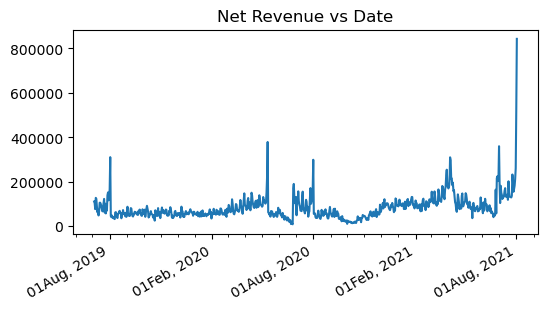

The maximum revenue was on:  02 August 2021 843257.5404
The minimum revenue was on:  25 June 2020 8255.1679


In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Let's make sure 'date' is actually a date in pandas
# data["date"] = pd.to_datetime(data["date"], format = "%d/%m/%Y")


fig, ax = plt.subplots(figsize=(6,3))

half_year_locator = mdates.MonthLocator(interval=6)
month_year_formatter = mdates.DateFormatter('%d%b, %Y') # The "," is intentional.

monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(month_year_formatter)
ax.plot(data["date"], data["nett_revenue"])

plt.title("Net Revenue vs Date")
fig.autofmt_xdate()
plt.show()

ind_max = np.argmax(data["nett_revenue"])
ind_min = np.argmin(data["nett_revenue"])
print("The maximum revenue was on: ", data.loc[ind_max,"date"].strftime('%d %B %Y'), data.loc[ind_max,"nett_revenue"])
print("The minimum revenue was on: ", data.loc[ind_min,"date"].strftime('%d %B %Y'), data.loc[ind_min,"nett_revenue"])

# data.loc[ind_max,"nett_revenue"])

Categories

In [7]:
import plotly.express as px

overall_spend = data.sum()
overall_spend_df = pd.DataFrame(overall_spend[spend_cols])
overall_spend_df.reset_index(inplace = True)
overall_spend_df.rename(columns={"index":"Spend_Col",0:"Total_Sum"}, inplace = True)

fig = px.pie(overall_spend_df, values='Total_Sum', names='Spend_Col', title='Overall Spending in Advertisements Channels')
fig.show()

C:\Users\user\AppData\Local\Temp\ipykernel_31064\3286070049.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  overall_spend = data.sum()


Highest Correlations

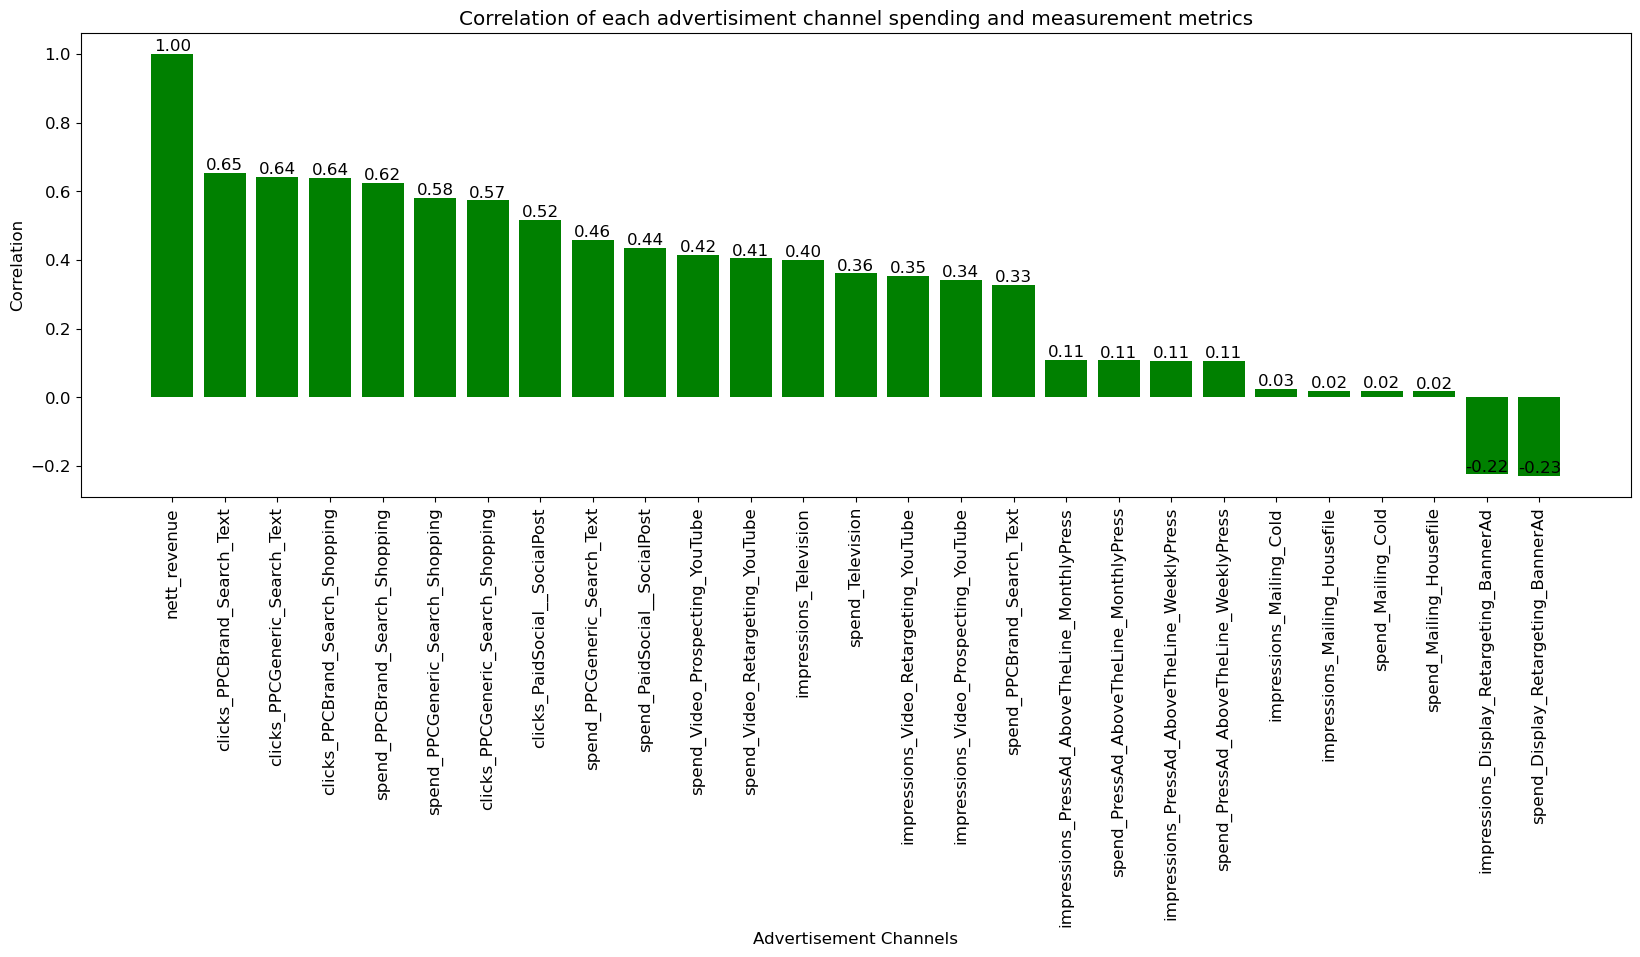

In [8]:
# Check correlation between variables
corr_matrix = data.corr()

net_revenue_corr = dict(sorted(corr_matrix["nett_revenue"].items(), key=lambda kv: kv[1], reverse=True))
net_revenue_corr_df = pd.DataFrame.from_dict(net_revenue_corr, orient='index', columns = ["Correlation"])
net_revenue_corr_df["Correlation"] = round(net_revenue_corr_df["Correlation"],3)
net_revenue_corr_df.reset_index(inplace = True)
net_revenue_corr_df.rename(columns={"index":"Advertising"}, inplace = True)




plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 12})

# Create bar chart
bar_plot = plt.bar(net_revenue_corr_df["Advertising"], net_revenue_corr_df["Correlation"], color= "Green")

# Add values on top of the bars
y_values = net_revenue_corr_df["Correlation"]

for i, bar in enumerate(bar_plot):
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(), f"{y_values[i]:.2f}", ha='center', va='bottom')

# Add axis labels and title
plt.xlabel('Advertisement Channels')
plt.ylabel('Correlation')
plt.title('Correlation of each advertisiment channel spending and measurement metrics')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='center')

# Adjust spacing between subplots to avoid overlapping labels
plt.subplots_adjust(bottom=0.3)

# Show plot
plt.show()

<AxesSubplot:>

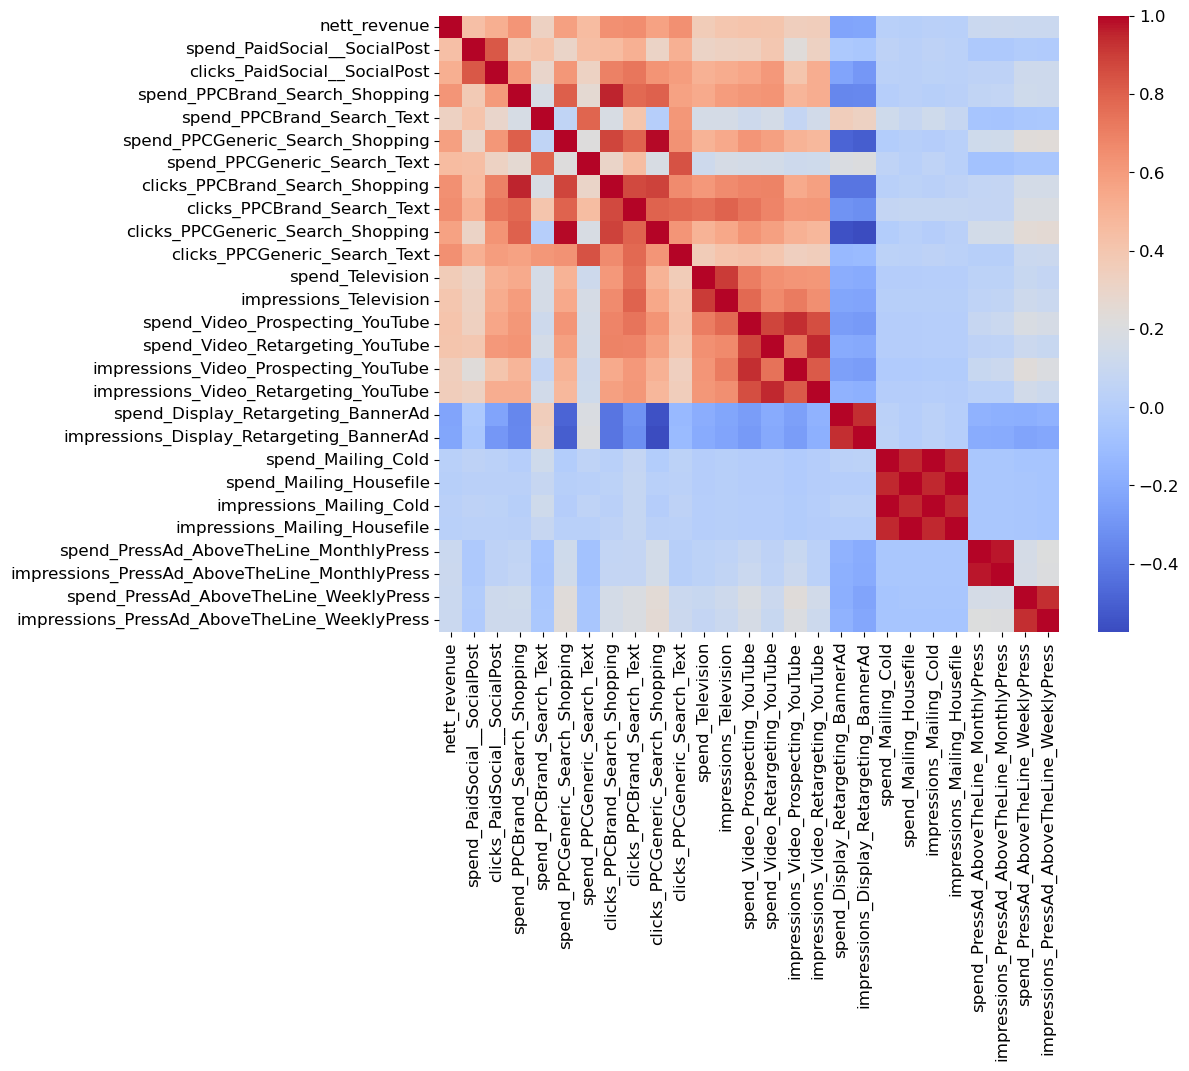

In [9]:
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2g', annot_kws={"size": 12})
# sns.heatmap(corr_matrix, cbar=1, linewidths=1)

% of 0 values in each column

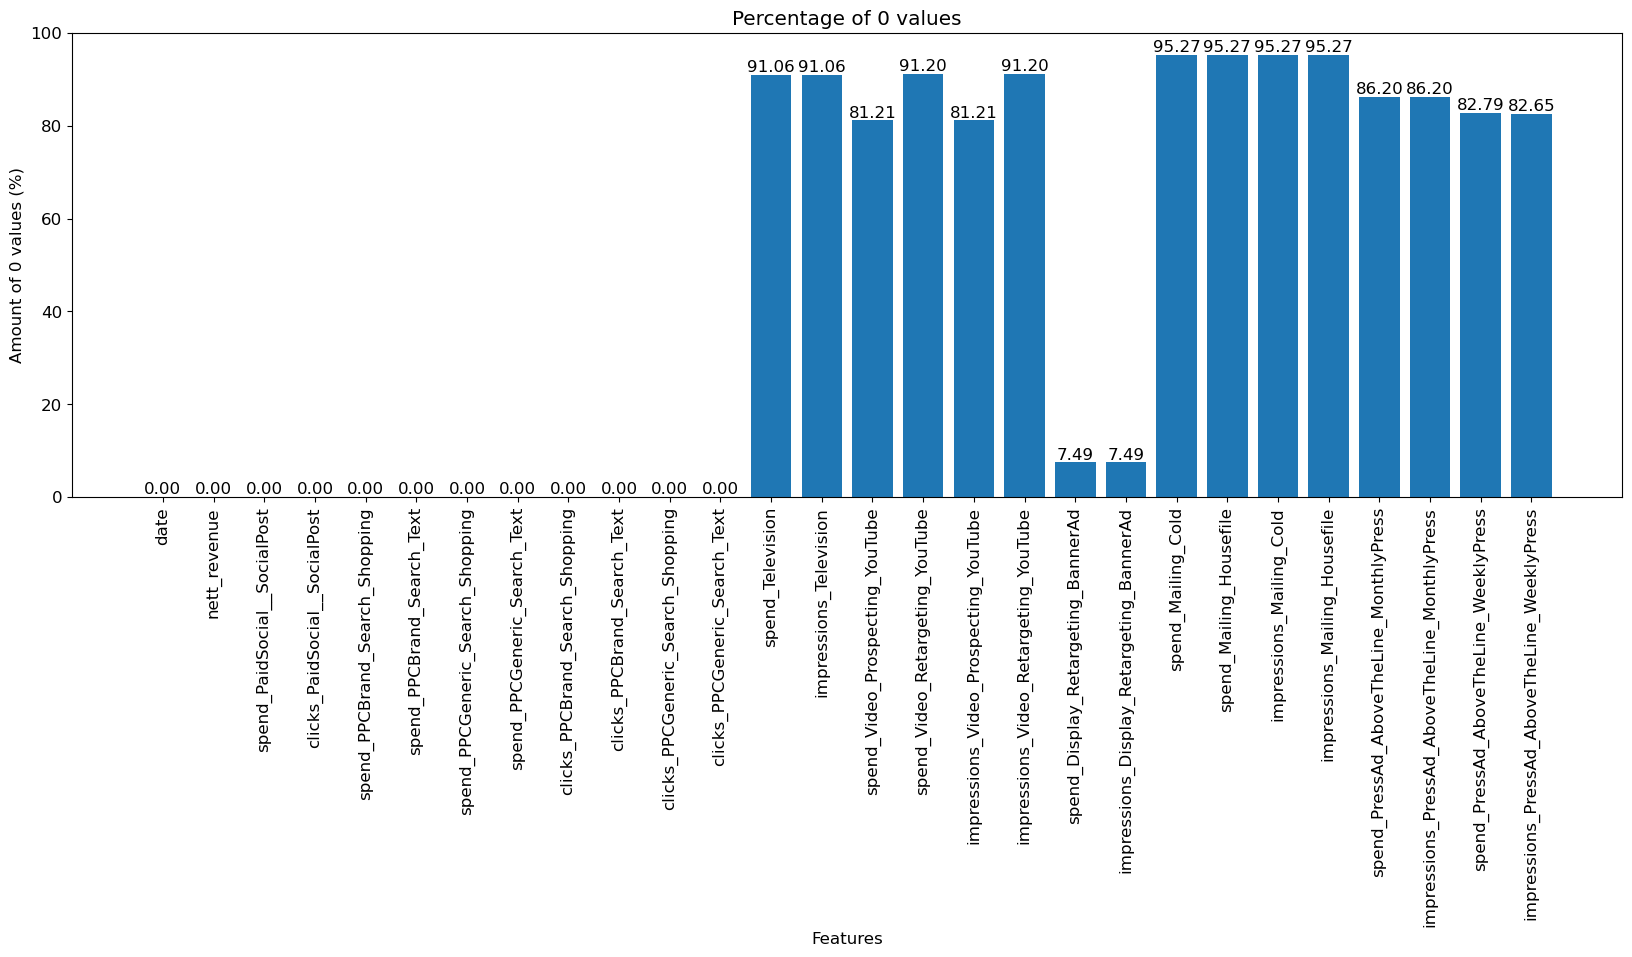

In [10]:
amt_zeroes = data.isin([0]).sum(axis=0)
percentage_zeroes = 100*(amt_zeroes/data.shape[0])
percentage_zeroes


# Set figure size and font size
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 12})

# Create bar chart
bar_plot = plt.bar(percentage_zeroes.index.tolist(), percentage_zeroes.values)

# Add values on top of the bars
y_values = percentage_zeroes.values

for i, bar in enumerate(bar_plot):
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(), f"{y_values[i]:.2f}", ha='center', va='bottom')

# Add axis labels and title
plt.xlabel('Features')
plt.ylabel('Amount of 0 values (%)')
plt.title('Percentage of 0 values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='center')

# Adjust spacing between subplots to avoid overlapping labels
plt.subplots_adjust(bottom=0.3)

# Show plot
plt.show()

This concludes that there has been very less spending on TV, Youtube, Mailing and monthly press. This could mean two things : - Either they have started spending on TV recently or they have stopped in the start. Let's find out. 

How did the advertising channels start?

From an initial rough analysis we think that First advertising channels were Paid Social + PPC + Banner Ads then Youtube Prospecting was introduced then Weekly Press then TV then Youtube Retargeting then Mailing. Let's find out

Video_Prospecting_YouTube

In [11]:
fig = px.line(data, x="date", y="spend_Video_Prospecting_YouTube", title="Spending in Youtube Prospecting", labels={
                     "date": "Date",
                     "spend_Television": "Amount Spent"
                 })

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# # Add Scatter plot
# fig.add_scatter(x=data['date'], y=data['nett_revenue'])

fig.show()

This suggests Youtube Prospecting Started on 27th Feburary 2021. Followed by one stopping : (Jun 2021 to July 2021) let's look at the data before that

This suggests that maybe MonthlyPress and Weekly press started before this. Let's check those out

Monthly Press

In [12]:
fig = px.line(data, x="date", y="spend_PressAd_AboveTheLine_MonthlyPress", title="Spending in Monthly Press", labels={
                     "date": "Date",
                     "spend_Television": "Amount Spend in TV"
                 })

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# # Add Scatter plot
# fig.add_scatter(x=data['date'], y=data['nett_revenue'])

fig.show()

First Start of Monthly Press: 5 July 2020, followed by several infrequent spending on Monthly Press

Weekly Press Ads

In [13]:
fig = px.line(data, x="date", y="spend_PressAd_AboveTheLine_WeeklyPress", title="Spending in Weekly Press", labels={
                     "date": "Date",
                     "spend_Television": "Amount Spend in TV"
                 })

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# # Add Scatter plot
# fig.add_scatter(x=data['date'], y=data['nett_revenue'])

fig.show()

First Start of Weekly Press: 5 July 2020, followed by several infrequent spending, but more frequent than Monthly

Looking at data before July 5 2020 to see if anything was started even earlier

In [14]:
from datetime import datetime
df = data[(data.date < datetime(2020, 7, 5))]
print(df.shape[0])
df.isin([0]).sum(axis=0)

367


date                                               0
nett_revenue                                       0
spend_PaidSocial__SocialPost                       0
clicks_PaidSocial__SocialPost                      0
spend_PPCBrand_Search_Shopping                     0
spend_PPCBrand_Search_Text                         0
spend_PPCGeneric_Search_Shopping                   0
spend_PPCGeneric_Search_Text                       0
clicks_PPCBrand_Search_Shopping                    0
clicks_PPCBrand_Search_Text                        0
clicks_PPCGeneric_Search_Shopping                  0
clicks_PPCGeneric_Search_Text                      0
spend_Television                                 367
impressions_Television                           367
spend_Video_Prospecting_YouTube                  367
spend_Video_Retargeting_YouTube                  367
impressions_Video_Prospecting_YouTube            367
impressions_Video_Retargeting_YouTube            367
spend_Display_Retargeting_BannerAd            

spend_Mailing_Housefile

In [15]:
fig = px.line(data, x="date", y="spend_Mailing_Housefile", title="Spending in Mailing_Housefile", labels={
                     "date": "Date",
                     "spend_Television": "Amount Spend in TV"
                 })

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# # Add Scatter plot
# fig.add_scatter(x=data['date'], y=data['nett_revenue'])

fig.show()

First Start : Aug 13 2019 
Very Infrequent Spending Only on few days mostly

spend_Mailing_Cold

In [16]:
fig = px.line(data, x="date", y="spend_Mailing_Cold", title="Spending in Mailing_Cold", labels={
                     "date": "Date",
                     "spend_Television": "Amount Spend in TV"
                 })

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# # Add Scatter plot
# fig.add_scatter(x=data['date'], y=data['nett_revenue'])

fig.show()

First Start : Aug 13 2019 
Very Infrequent Spending Only on few days mostly : Similar to Mailing Housefile

spend_Video_Retargeting_YouTube

In [17]:
fig = px.line(data, x="date", y="spend_Video_Retargeting_YouTube", title="Spending in Retargeting Youtube", labels={
                     "date": "Date",
                     "spend_Television": "Amount Spend in TV"
                 })

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# # Add Scatter plot
# fig.add_scatter(x=data['date'], y=data['nett_revenue'])

fig.show()

TV

In [18]:
fig = px.line(data, x="date", y="spend_Television", title="Spending in TV", labels={
                     "date": "Date",
                     "spend_Television": "Amount Spend in TV"
                 })

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# # Add Scatter plot
# fig.add_scatter(x=data['date'], y=data['nett_revenue'])

fig.show()

After analysis the timeline of advertisiment spending is: 

4th July 2019 (Start) PPC+ Social Post+ Banner Ads running
13th August 2019 - Mailing (Cold and Housefile) Introduced
5th July 2020 - Monthly and Weekly Press introduced 
27th Feburary 2021 - Youtube (Video Prospecting and Video Retargeting) introduced 


After this analysis we realize how far from the baseline we have come to calculate the timeframe of our advertisment channels

Now we will roughly see how our net revenue behaves in these time intervals. Maybe we will be able to roughly tell the effects of the introduction of these channels.  The time intervals for are as follows : 

Interval 1 : **4th July 2019 to 12th August 2019**
Interval 2: **13th August 2019 to 4th July 2020**
Interval 3: **5th July 2020 to 26th Feb 2021**
Interval 4: **27th Feb 2021 to 2nd August 2021**

In [19]:
fig = px.line(data, x="date", y="nett_revenue", title="How Net revenue is distributed", labels={
                     "date": "Date",
                     "nett_revenue": "Revenue"
                 })

fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# Add Scatter plot
fig.add_vline(x= datetime(2019, 8, 13),line_dash="dash", line_color="green")

fig.add_vline(x= datetime(2020, 7, 5),line_dash="dash", line_color="purple")

fig.add_vline(x= datetime(2021, 2, 27),line_dash="dash", line_color="orange")

fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")

fig.show()

This will be helpful in splitting as we will take equal parts of data from each interval : Stratified sampling

More EDA : Grouping by each month

In [20]:
import warnings
from pandas.core.common import SettingWithCopyWarning
import calendar

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


# To turn from scientific notation to normal
# pd.set_option('display.float_format', lambda x: '%.5f' % x)


data_gr = data.groupby(by = [data.date.dt.month, data.date.dt.year]).sum()

data_gr.index.names = ['Month', "Year"]

intial_cols = data_gr.columns.tolist()

for col in spend_cols:
        
        data_gr[col.split("_",1)[1] ] = round((data_gr["nett_revenue"] / (data_gr[col])),2)
        
data_gr.replace([np.inf, -np.inf], 0, inplace=True)
data_gr.fillna(0,inplace = True)
data_gr.reset_index(inplace = True)
data_gr.sort_values(by=['Year',"Month"],inplace = True,ignore_index=True)



data_gr['Month'] = data_gr['Month'].apply(lambda x: calendar.month_abbr[x])

data_month = data_gr.loc[:,~data_gr.columns.isin(intial_cols)]

data_month.insert(2,'Month_Year','')
data_month.insert(3,'Net_Revenue_per_spend_total','')

data_month["Month_Year"] = data_month["Month"] + "_"+ data_month["Year"].astype(str)

data_month["Net_Revenue_per_spend_total"] = data_month.iloc[:,4:].sum(axis = 1)

data_month.tail()
# data_month.to_csv("Channel_RPS_per_month.csv")

Month  Year Month_Year  Net_Revenue_per_spend_total  \
21   Apr  2021   Apr_2021                      9499.05   
22   May  2021   May_2021                     13579.20   
23   Jun  2021   Jun_2021                     10084.71   
24   Jul  2021   Jul_2021                      8213.35   
25   Aug  2021   Aug_2021                    128199.94   

    PaidSocial__SocialPost  PPCBrand_Search_Shopping  PPCBrand_Search_Text  \
21                   82.41                    299.41                461.52   
22                   64.09                    155.26                304.30   
23                   68.73                    187.11                344.86   
24                   44.61                    178.59                304.90   
25                  162.51                    393.18                991.46   

    PPCGeneric_Search_Shopping  PPCGeneric_Search_Text  Television  \
21                       41.79                   45.99        0.00   
22                       28.28                   39.07        0.00   
23                       34.12                   61.49       18.42   
24                       37.58                   49.53        9.20   
25                      145.03                  196.50      126.96   

    Video_Prospecting_YouTube  Video_Retargeting_YouTube  \
21                    2029.74                       0.00   
22                     830.25                    8082.75   
23                     762.46                    3726.20   
24                     386.67                    1681.06   
25                    2245.77                    8170.89   

    Display_Retargeting_BannerAd  Mailing_Cold  Mailing_Housefile  \
21                       6356.22          0.00               0.00   
22                       3873.77         28.91              27.63   
23                       4719.76         20.96              32.39   
24                       3568.45        437.50             743.73   
25                     115767.64          0.00               0.00   

    PressAd_AboveTheLine_MonthlyPress  PressAd_AboveTheLine_WeeklyPress  
21                             118.27                             63.70  
22                              84.61                             60.28  
23                              66.78                             41.43  
24                             771.53                              0.00  
25                               0.00                              0.00

In [21]:
fig = px.bar(data_month.iloc[21:26,:], x="Month_Year", y= data_month.columns[4:7].tolist(), title="Net Revenue per spend of different channels in most efficient months", labels={
                     "Month_Year": "Time Frame",
                     "value": "Net Revenue per Spend of Each Channel"
                 }, color_discrete_sequence=px.colors.qualitative.Alphabet, text_auto = True)
fig.show()

Looking at the first three coloumns, dates (1 and 2), in just the 2 days than that of the past 5 months. This might be due to any luck, buisness stratergy or something else, hence we consider them as the special dates and therefore exempt that from our further EDA analysis.  However, we won't discard the data in creating a model, but for sure would need to do something about that. 

Visualisation

In [22]:
data_month = data_month.iloc[0:25,:]

In [23]:
# Sort by net revenue and pick the top 10 months with revenue 
data_month_top_10 = data_month.sort_values(by=["Net_Revenue_per_spend_total"],ascending = False, ignore_index=True).iloc[:10,:]
# Plotting

fig = px.bar(data_month_top_10, x=data_month_top_10["Month_Year"], y= data_month_top_10.columns[4:].tolist(), title="Net Revenue per spend of different channels in most efficient months", labels={
                     "Month_Year": "Time Frame",
                     "value": "Net Revenue per Spend of Each Channel"
                 }, color_discrete_sequence=px.colors.qualitative.Alphabet)

# fig.update_layout(bargap = 0.2, bargroupgap = 0.4)

fig.show()
# display(data_month_top_10[["Month_Year","Net_Revenue_per_spend"]])

# Which Channels are running

cols = data_month_top_10.iloc[:,4:].columns
bt = data_month_top_10.iloc[:,4:].apply(lambda x: x > 0)
channels_running = bt.apply(lambda x: list(cols[x.values]), axis=1)


paid_cols = data_month_top_10.columns[4:]

for i in range(10):
    print(data_month_top_10["Month_Year"][i],"Channels Not running: ",paid_cols[~paid_cols.isin(channels_running[i])].values)

Feb_2021 Channels Not running:  ['Mailing_Cold' 'Mailing_Housefile']
Mar_2021 Channels Not running:  []
May_2021 Channels Not running:  ['Television']
Aug_2019 Channels Not running:  ['Television' 'Video_Prospecting_YouTube' 'Video_Retargeting_YouTube'
 'PressAd_AboveTheLine_MonthlyPress' 'PressAd_AboveTheLine_WeeklyPress']
Jun_2021 Channels Not running:  []
Apr_2021 Channels Not running:  ['Television' 'Video_Retargeting_YouTube' 'Mailing_Cold'
 'Mailing_Housefile']
Jul_2021 Channels Not running:  ['PressAd_AboveTheLine_WeeklyPress']
Jan_2021 Channels Not running:  ['Television' 'Video_Prospecting_YouTube' 'Video_Retargeting_YouTube']
Dec_2020 Channels Not running:  ['Television' 'Video_Prospecting_YouTube' 'Video_Retargeting_YouTube']
Nov_2020 Channels Not running:  ['Television' 'Video_Prospecting_YouTube' 'Video_Retargeting_YouTube'
 'Mailing_Cold' 'Mailing_Housefile']


In [24]:
data_gr = data.iloc[:-2,:].groupby(by = data["date"].dt.to_period('Q')).sum()

data_gr.index.names = ["Year_Quarter"]

intial_cols = data_gr.columns.tolist()

for col in spend_cols:
        
        data_gr[col.split("_",1)[1] ] = round((data_gr["nett_revenue"] / (data_gr[col])),2)

data_gr.replace([np.inf, -np.inf], 0, inplace=True)
data_gr.fillna(0,inplace = True)
data_gr.reset_index(inplace = True)

data_quarter = data_gr.loc[:,~data_gr.columns.isin(intial_cols)]

# data_quarter.sort_values(by=["nett_revenue"],inplace = True, ignore_index=True)

data_quarter.insert(1,'Net_Revenue_per_spend','')
data_quarter["Net_Revenue_per_spend"] = data_quarter.iloc[:,2:].sum(axis = 1)

data_quarter.sort_values(by=["Net_Revenue_per_spend"],ascending = False, inplace = True, ignore_index=True)

data_quarter["Year_Quarter"] = data_quarter["Year_Quarter"].astype(str)
data_quarter
# data_quarter.to_csv("Channel_RPS_Quaterly.csv")

Year_Quarter  Net_Revenue_per_spend  PaidSocial__SocialPost  \
0       2021Q1               18726.43                  101.91   
1       2021Q2               15935.69                   72.36   
2       2021Q3                8213.35                   44.61   
3       2019Q3                2387.39                   31.15   
4       2020Q4                2186.19                   67.26   
5       2020Q2                1688.74                   67.09   
6       2020Q3                1513.09                   40.65   
7       2020Q1                1344.10                   62.40   
8       2019Q4                1167.58                   93.06   

   PPCBrand_Search_Shopping  PPCBrand_Search_Text  PPCGeneric_Search_Shopping  \
0                    338.66                425.46                       50.63   
1                    208.23                370.73                       34.79   
2                    178.59                304.90                       37.58   
3                    471.33                206.45                      226.37   
4                    316.28                277.14                       48.55   
5                    423.44                141.64                      112.54   
6                    358.93                150.93                       72.45   
7                    407.97                127.82                       94.31   
8                    251.17                168.02                       80.94   

   PPCGeneric_Search_Text  Television  Video_Prospecting_YouTube  \
0                   52.00       23.65                    1037.48   
1                   47.03       63.85                    1073.13   
2                   49.53        9.20                     386.67   
3                   28.32        0.00                       0.00   
4                   44.48        0.00                       0.00   
5                   25.52        0.00                       0.00   
6                   33.18        0.00                       0.00   
7                   22.67        0.00                       0.00   
8                   30.89        0.00                       0.00   

   Video_Retargeting_YouTube  Display_Retargeting_BannerAd  Mailing_Cold  \
0                   11539.51                       4926.18         41.80   
1                    8873.08                       4955.23         42.33   
2                    1681.06                       3568.45        437.50   
3                       0.00                       1361.10         22.24   
4                       0.00                       1226.22         78.10   
5                       0.00                        845.42         26.10   
6                       0.00                        678.92         26.44   
7                       0.00                        580.60         14.37   
8                       0.00                        492.68         19.38   

   Mailing_Housefile  PressAd_AboveTheLine_MonthlyPress  \
0              51.59                              73.72   
1              52.01                              88.53   
2             743.73                             771.53   
3              40.43                               0.00   
4              55.75                              42.91   
5              46.99                               0.00   
6              36.41                              62.77   
7              33.96                               0.00   
8              31.44                               0.00   

   PressAd_AboveTheLine_WeeklyPress  
0                             63.84  
1                             54.39  
2                              0.00  
3                              0.00  
4                             29.50  
5                              0.00  
6                             52.41  
7                              0.00  
8                              0.00

In [25]:
# Plotting
fig = px.bar(data_quarter, x=data_quarter["Year_Quarter"], y= data_quarter.columns[2:].tolist(), title="Net Revenue per spend of different channels in Best Revenue Quarters", labels={
                     "Month_Year": "Time Frame",
                     "value": "Net Revenue per Spend"
                 }, color_discrete_sequence=[ "Khaki", "Red", "Orange", "Purple", "Yellow", "Magenta", "Pink","Cyan","Blue", "Teal", "Lime", "Brown", "Gray"])

# fig.update_layout(bargap=0.07)

fig.show()

cols = data_quarter.iloc[:,4:].columns
bt = data_quarter.iloc[:,4:].apply(lambda x: x > 0)
channels_running = bt.apply(lambda x: list(cols[x.values]), axis=1)


paid_cols = data_quarter.columns[4:]

for i in range(9):
    print(data_quarter["Year_Quarter"][i],":" ,"Channels not running are",paid_cols[~paid_cols.isin(channels_running[i])].values)

2021Q1 : Channels not running are []
2021Q2 : Channels not running are []
2021Q3 : Channels not running are ['PressAd_AboveTheLine_WeeklyPress']
2019Q3 : Channels not running are ['Television' 'Video_Prospecting_YouTube' 'Video_Retargeting_YouTube'
 'PressAd_AboveTheLine_MonthlyPress' 'PressAd_AboveTheLine_WeeklyPress']
2020Q4 : Channels not running are ['Television' 'Video_Prospecting_YouTube' 'Video_Retargeting_YouTube']
2020Q2 : Channels not running are ['Television' 'Video_Prospecting_YouTube' 'Video_Retargeting_YouTube'
 'PressAd_AboveTheLine_MonthlyPress' 'PressAd_AboveTheLine_WeeklyPress']
2020Q3 : Channels not running are ['Television' 'Video_Prospecting_YouTube' 'Video_Retargeting_YouTube']
2020Q1 : Channels not running are ['Television' 'Video_Prospecting_YouTube' 'Video_Retargeting_YouTube'
 'PressAd_AboveTheLine_MonthlyPress' 'PressAd_AboveTheLine_WeeklyPress']
2019Q4 : Channels not running are ['Television' 'Video_Prospecting_YouTube' 'Video_Retargeting_YouTube'
 'PressAd_

**Stratified Sampling** : to remove the bias of channels starting at different times + Learning

Advertising Adstock and Carryover Effect

Creating a Saturation Effect : Diminishing Returns

a = hyperparameter controling shape of saturation curve (a>0)

X = spend

saturation effect = 1-exp(a*X)

**Essemble Learning** : Train multiple models on different subsets of the training data, either by randomly sampling the data or by stratifying the samples based on some criteria. These models can then be combined in various ways, such as taking an average of their predictions or using a weighted combination based on their individual performance.

**Advertising Adstock and Carryover Effect**

**Creating a Saturation Effect : Diminishing Returns**

a = hyperparameter controling shape of saturation curve (a>0)

X = spend

saturation effect = 1-exp(a*X)

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted, check_array

#with check for a greater than 0
class ExponentialSaturation(BaseEstimator,TransformerMixin):
    def __init__(self,a=.0005):
        if a > 0:
            self.a = a
        else:
            self.a = 1
            
    def fit(self,X,y=None):
        X = check_array(X)
        self._check_n_features(X,reset=True)
        return self
    
    def transform(self,X):
        check_is_fitted(self)
        X = check_array(X)
        self._check_n_features(X,reset=False)

        return 1 - np.exp(-self.a*X)

In [27]:
paid_social_df = data[["date", "spend_PaidSocial__SocialPost"]]
SE = ExponentialSaturation()
paid_social_df["Saturated_spends"] = SE.fit_transform(data[["spend_PaidSocial__SocialPost"]])

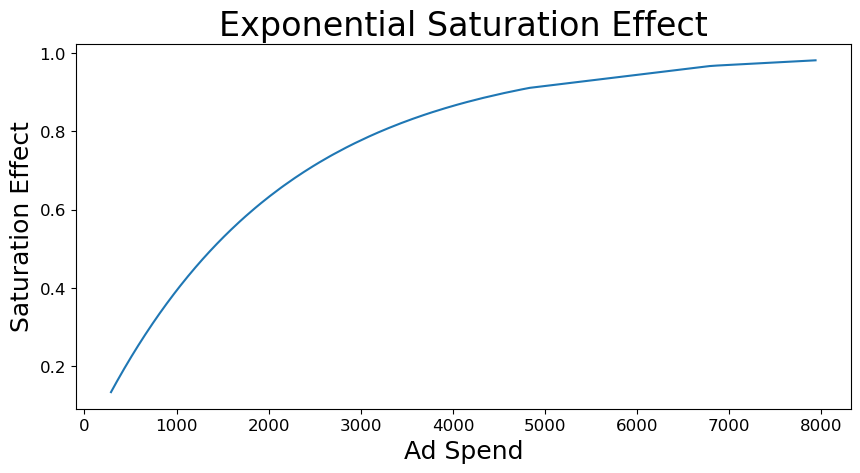

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(ax=ax,x=paid_social_df["spend_PaidSocial__SocialPost"],y=paid_social_df["Saturated_spends"])
ax.set_title('Exponential Saturation Effect',fontsize=24)
plt.xlabel('Ad Spend',fontsize=18)
plt.ylabel('Saturation Effect',fontsize=18)
plt.subplots_adjust(bottom=0.15)
#sns.set(font_scale = 1)
# plt.savefig('Images/exp_saturation_effect.png')

Creating a Carry-Over Effect

In [29]:
from scipy.signal import convolve2d
import numpy as np

# we use a strength of 50% and a length of 2, the spending sequence from above becomes
# If you know convolutional layers from CNNs

class ExponentialCarryover(BaseEstimator, TransformerMixin):
    def __init__(self, strength=0.3, length=1):
        self.strength = strength
        self.length = length

    def fit(self, X, y=None):
        X = check_array(X)
        self._check_n_features(X, reset=True)
        self.sliding_window_ = (
            self.strength ** np.arange(self.length + 1)
        ).reshape(-1, 1)
        return self

    def transform(self, X: np.ndarray):
        check_is_fitted(self)
        X = check_array(X)
        self._check_n_features(X, reset=False)
        convolution = convolve2d(X, self.sliding_window_)
        if self.length > 0:
            convolution = convolution[: -self.length]
        return convolution

In [30]:
CE = ExponentialCarryover()
paid_social_df["Carried_spends"] = CE.fit_transform(data[["spend_PaidSocial__SocialPost"]])
paid_social_df.set_index('date', inplace = True)

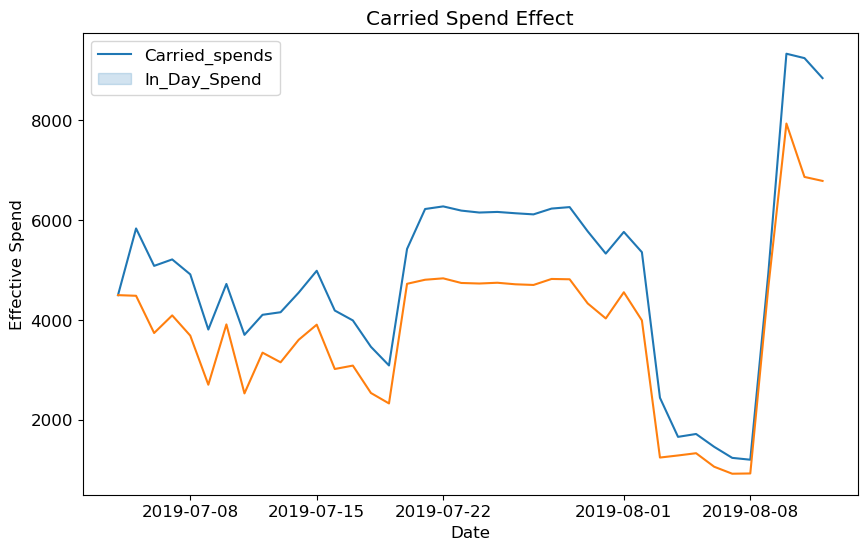

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=paid_social_df[0:40].index,y=paid_social_df[0:40]["Carried_spends"])
sns.lineplot(x=paid_social_df[0:40].index,y=paid_social_df[0:40]["spend_PaidSocial__SocialPost"])
ax.set_xlabel("Date")
ax.set_ylabel("Effective Spend")
ax.set_title("Carried Spend Effect")
ax.legend(["Carried_spends","In_Day_Spend"])
plt.show()
# plt.savefig('Images/Carried_spend_effect.png');

4 Different Models with Stratified Sampling

In [32]:
# PPC+ Social Post+ Banner Ads Only
data_1 = data[(data.date < datetime(2019, 8, 13))]
data_1 = data_1.sample(frac=1, random_state = 25).reset_index(drop=True)
train_d1 = data_1.iloc[0:30]
test_d1 = data_1.iloc[30:]

# # PPC+ Social Post+ Banner Ads + Mailing
data_2 = data[(data.date >= datetime(2019, 8, 13)) & (data.date < datetime(2020, 7, 5))]
data_2 = data_2.sample(frac=1, random_state = 25).reset_index(drop=True)
train_d2 = data_2.iloc[0:245]
test_d2 = data_2.iloc[245:]

# PPC+ Social Post+ Banner Ads + Mailing + Monthly and Weekly Press
data_3 = data[(data.date >= datetime(2020, 7, 5)) & (data.date < datetime(2021, 2, 27)) ]
data_3 = data_3.sample(frac=1, random_state = 25).reset_index(drop=True)
train_d3 = data_3.iloc[0:178]
test_d3 = data_3.iloc[178:]

# PPC+ Social Post+ Banner Ads + Mailing + Monthly and Weekly Press + TV + Youtube
data_4 = data.iloc[:-2,:][(data.iloc[:-2,:].date >= datetime(2021, 2, 27)) ]
data_4 = data_4.sample(frac=1, random_state = 25).reset_index(drop=True)
train_d4 = data_4.iloc[0:118]
test_d4 = data_4.iloc[118:]

print("The overall shapes are: ",data_1.shape,data_2.shape, data_3.shape,data_4.shape)
print("Train shapes:  ",train_d1.shape,train_d2.shape, train_d3.shape,train_d4.shape)
print("Test shapes:  ",test_d1.shape,test_d2.shape, test_d3.shape,test_d4.shape)

The overall shapes are:  (40, 28) (327, 28) (237, 28) (155, 28)
Train shapes:   (30, 28) (245, 28) (178, 28) (118, 28)
Test shapes:   (10, 28) (82, 28) (59, 28) (37, 28)


Model 1 : train_d1 

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

adstock_1 = ColumnTransformer(
    [
     ('SocialPost', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PaidSocial__SocialPost']),
     ('PPCBrand_Search_Shopping', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCBrand_Search_Shopping']),
     ('PPCBrand_Search_Text', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCBrand_Search_Text']),
        
        ('PPCGeneric_Search_Shopping', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCGeneric_Search_Shopping']),
        
        ('PPCGeneric_Search_Text', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCGeneric_Search_Text']),
        
        ('Display_Retargeting_BannerAd', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_Display_Retargeting_BannerAd']),
    ],
    remainder='passthrough'
)


model_1 = Pipeline([
                  ('adstock_1', adstock_1),
                  ('regression', Ridge( alpha = 4))
])

model_1.fit(train_d1.iloc[:,2:], train_d1.iloc[:,1])

Pipeline(steps=[('adstock_1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('SocialPost',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['spend_PaidSocial__SocialPost']),
                                                 ('PPCBrand_Search_Shopping',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  [...
                                                 ('PPCGeneric_Search_Text',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['spend_PPCGeneric_Search_Text']),
                                                 ('Display_Retargeting_BannerAd',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['spend_Display_Retargeting_BannerAd'])])),
                ('regression', Ridge(alpha=4))])

Score model 1: 

In [34]:
display(model_1.score(train_d1.iloc[:,2:], train_d1.iloc[:,1]))

adstock_1_data_train_d1 = pd.DataFrame(
    model_1.named_steps['adstock_1'].transform(train_d1.iloc[:,2:]),
    columns=train_d1.iloc[:,2:].columns,
    index=train_d1.iloc[:,2:].index
)

display(adstock_1_data_train_d1.head())


print('Coefficients:', model_1.named_steps['regression'].coef_)
print('Intercept:', model_1.named_steps['regression'].intercept_)

0.7050130727546482

spend_PaidSocial__SocialPost  clicks_PaidSocial__SocialPost  \
0                      0.905361                       0.057567   
1                      0.689424                       0.062761   
2                      0.876849                       0.075747   
3                      0.921110                       0.125963   
4                      0.948023                       0.105737   

   spend_PPCBrand_Search_Shopping  spend_PPCBrand_Search_Text  \
0                        0.149742                    0.123260   
1                        0.137633                    0.156777   
2                        0.258205                    0.172700   
3                        0.322098                    0.265434   
4                        0.230168                    0.233667   

   spend_PPCGeneric_Search_Shopping  spend_PPCGeneric_Search_Text  \
0                          0.743589                      0.053131   
1                          0.710897                      0.016245   
2                          0.825314                      0.057364   
3                          0.914836                      0.072769   
4                          0.859850                      0.074345   

   clicks_PPCBrand_Search_Shopping  clicks_PPCBrand_Search_Text  \
0                         1.561575                     0.419890   
1                         0.130244                     0.425058   
2                         1.064557                     0.510328   
3                         1.636819                     0.870788   
4                         1.739226                     0.512912   

   clicks_PPCGeneric_Search_Shopping  clicks_PPCGeneric_Search_Text  ...  \
0                           0.634833                       0.175654  ...   
1                           0.495320                       0.176014  ...   
2                           0.874095                       0.208409  ...   
3                           1.209678                       0.384423  ...   
4                           0.719843                       0.236845  ...   

   spend_Display_Retargeting_BannerAd  \
0                                 0.0   
1                                 0.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   

   impressions_Display_Retargeting_BannerAd  spend_Mailing_Cold  \
0                                  1.874261                 0.0   
1                                  0.000000                 0.0   
2                                  1.288330                 0.0   
3                                  1.233293                 0.0   
4                                  1.990668                 0.0   

   spend_Mailing_Housefile  impressions_Mailing_Cold  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   

   impressions_Mailing_Housefile  spend_PressAd_AboveTheLine_MonthlyPress  \
0                            0.0                                      0.0   
1                            0.0                                      0.0   
2                            0.0                                      0.0   
3                            0.0                                      0.0   
4                            0.0                                      0.0   

   impressions_PressAd_AboveTheLine_MonthlyPress  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   spend_PressAd_AboveTheLine_WeeklyPress  \
0                                     0.0   
1                                     0.0   
2                                     0.0 

Coefficients: [ 2068.40564909  1095.57393079  3517.94262907  2880.53264708
  3587.44984722  1106.12870373  2726.65931778  9253.04880437
 13230.5494284   4792.80243143 17850.04793679     0.
     0.             0.             0.             0.
     0.         16670.81915628     0.             0.
     0.             0.             0.             0.
     0.             0.        ]
Intercept: 13563.691064029597


Hyperparameter optimisation

In [35]:
from optuna.integration import OptunaSearchCV
from optuna.distributions import FloatDistribution, IntDistribution
from optuna.distributions import UniformDistribution, IntUniformDistribution

from sklearn.model_selection import cross_val_score, TimeSeriesSplit

tuned_model_1 = OptunaSearchCV(
    estimator=model_1,
    param_distributions={
        'adstock_1__SocialPost__carryover__strength': FloatDistribution(0, 1),
        'adstock_1__SocialPost__carryover__length': IntDistribution(0, 6),
        'adstock_1__SocialPost__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_1__PPCBrand_Search_Shopping__carryover__strength': FloatDistribution(0, 1),
        'adstock_1__PPCBrand_Search_Shopping__carryover__length': IntDistribution(0, 6),
        'adstock_1__PPCBrand_Search_Shopping__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_1__PPCBrand_Search_Text__carryover__strength': FloatDistribution(0, 1),
        'adstock_1__PPCBrand_Search_Text__carryover__length': IntDistribution(0, 6),
        'adstock_1__PPCBrand_Search_Text__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': FloatDistribution(0, 1),
        'adstock_1__PPCGeneric_Search_Shopping__carryover__length': IntDistribution(0, 6),
        'adstock_1__PPCGeneric_Search_Shopping__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_1__PPCGeneric_Search_Text__carryover__strength': FloatDistribution(0, 1),
        'adstock_1__PPCGeneric_Search_Text__carryover__length': IntDistribution(0, 6),
        'adstock_1__PPCGeneric_Search_Text__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_1__Display_Retargeting_BannerAd__carryover__strength': FloatDistribution(0, 1),
        'adstock_1__Display_Retargeting_BannerAd__carryover__length': IntDistribution(0, 6),
        'adstock_1__Display_Retargeting_BannerAd__saturation__a': FloatDistribution(0, 0.01),
    },
    n_trials=100,
    cv=TimeSeriesSplit(),
    random_state=0
)


C:\Users\user\AppData\Local\Temp\ipykernel_31064\1074629166.py:7: ExperimentalWarning:

OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.



In [36]:
tuned_model_1.fit(train_d1.iloc[:,2:],train_d1.iloc[:,1])

[I 2023-03-06 15:46:23,320] A new study created in memory with name: no-name-9c169499-6912-40cc-8afa-b6075aefd072
[I 2023-03-06 15:46:23,447] Trial 0 finished with value: -0.539641767170011 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.4860473230215504, 'adstock_1__SocialPost__carryover__length': 4, 'adstock_1__SocialPost__saturation__a': 0.009855760506615989, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.1955964101622225, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.00980582177099305, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.18048029738995275, 'adstock_1__PPCBrand_Search_Text__carryover__length': 4, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.008463095456331128, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.7967092952533198, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_1__PPCGeneric_Search_Shopping__saturation_

[I 2023-03-06 15:46:24,274] Trial 6 finished with value: -0.561727869907504 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.5254913477433658, 'adstock_1__SocialPost__carryover__length': 5, 'adstock_1__SocialPost__saturation__a': 4.480942451490222e-05, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.05023698828102108, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.00862834777611814, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.7661726753359349, 'adstock_1__PPCBrand_Search_Text__carryover__length': 0, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.008670036214812635, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.3072840915448757, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.008191287595982071, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.23079272261018335, 'adstoc

[I 2023-03-06 15:46:25,380] Trial 12 finished with value: -0.5305653846618676 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.9886949348519302, 'adstock_1__SocialPost__carryover__length': 4, 'adstock_1__SocialPost__saturation__a': 0.0025906780973598974, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.7425090920089454, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.004110891976476562, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.35331759106983074, 'adstock_1__PPCBrand_Search_Text__carryover__length': 6, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.006747110155248053, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.5224277228242795, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.0021287294148042615, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.4062684971145636, 'ads

[I 2023-03-06 15:46:26,458] Trial 18 finished with value: -0.5418725954163136 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.876443183380776, 'adstock_1__SocialPost__carryover__length': 4, 'adstock_1__SocialPost__saturation__a': 0.0010171030449913105, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.31596430321264957, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.005444219445655761, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.08888310649645409, 'adstock_1__PPCBrand_Search_Text__carryover__length': 5, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.00416340452060069, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.4003920665572238, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.009760760452330148, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.5141815518920945, 'adsto

[I 2023-03-06 15:46:27,583] Trial 24 finished with value: -0.5259223570166517 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.8024917230931878, 'adstock_1__SocialPost__carryover__length': 1, 'adstock_1__SocialPost__saturation__a': 0.0009536247029538038, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.011014644551203781, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.009093055518872871, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.4336568087052386, 'adstock_1__PPCBrand_Search_Text__carryover__length': 4, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.004623909776568473, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.11365762563586153, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.00781521742149155, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.8007219503717737, 'ads

[I 2023-03-06 15:46:28,761] Trial 30 finished with value: -0.5231012002541207 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.8133201517982581, 'adstock_1__SocialPost__carryover__length': 3, 'adstock_1__SocialPost__saturation__a': 0.0007138511352578084, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.015171893414178628, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.009457106597817976, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.22612491681254995, 'adstock_1__PPCBrand_Search_Text__carryover__length': 3, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.005128570044593627, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.17502648305184418, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.006027733549641109, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.718133503236207, 'ad

[I 2023-03-06 15:46:29,881] Trial 36 finished with value: -0.5390469284256476 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.8359145631077443, 'adstock_1__SocialPost__carryover__length': 1, 'adstock_1__SocialPost__saturation__a': 2.813000462920795e-05, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.23487012494777607, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.008402380348162661, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.1504154598036056, 'adstock_1__PPCBrand_Search_Text__carryover__length': 3, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.00540215589656687, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.2695417265059002, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.007295167596890052, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.8431945663630738, 'adsto

[I 2023-03-06 15:46:30,938] Trial 42 finished with value: -0.5142197110187482 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.47417889151105297, 'adstock_1__SocialPost__carryover__length': 0, 'adstock_1__SocialPost__saturation__a': 0.001882342970902349, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.16864469962346912, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.008063808744811133, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.29181681403568316, 'adstock_1__PPCBrand_Search_Text__carryover__length': 0, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.002321968352745598, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.0032142410712509084, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.00661179941343981, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.5506021128148793, 'a

[I 2023-03-06 15:46:32,001] Trial 48 finished with value: -0.5157516720793194 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.46615960464609596, 'adstock_1__SocialPost__carryover__length': 0, 'adstock_1__SocialPost__saturation__a': 0.003257030575831622, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.21169785718639764, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.007102528868956498, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.36254185080142737, 'adstock_1__PPCBrand_Search_Text__carryover__length': 0, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.0018767348528185212, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.039640894460346104, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.0052570382132278905, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.4811329751199052, 

[I 2023-03-06 15:46:33,077] Trial 54 finished with value: -0.5140582369034934 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.36929248735574083, 'adstock_1__SocialPost__carryover__length': 0, 'adstock_1__SocialPost__saturation__a': 0.005494555140187051, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.17702862086690724, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.00783843373400406, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.22201100976465094, 'adstock_1__PPCBrand_Search_Text__carryover__length': 0, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.0021913425757824822, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.13090278247354778, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.004654207962275069, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.4911414713788543, 'ad

[I 2023-03-06 15:46:34,191] Trial 60 finished with value: -0.5257194223312094 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.31935962352641045, 'adstock_1__SocialPost__carryover__length': 1, 'adstock_1__SocialPost__saturation__a': 0.005902234018663381, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.24431162626646097, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.007194062099183113, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.06655440954660125, 'adstock_1__PPCBrand_Search_Text__carryover__length': 0, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.000747921830351228, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.03751373890071763, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.004941633509321933, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.4540513335025224, 'ad

[I 2023-03-06 15:46:35,317] Trial 66 finished with value: -0.5256047279615389 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.589136296166084, 'adstock_1__SocialPost__carryover__length': 1, 'adstock_1__SocialPost__saturation__a': 0.003601719764015602, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.2883172068849966, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.00870131794601033, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.397472489499613, 'adstock_1__PPCBrand_Search_Text__carryover__length': 1, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.0015607759411148097, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.09224442087564537, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.0050741362625585425, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.5918716448622525, 'adstoc

[I 2023-03-06 15:46:36,506] Trial 72 finished with value: -0.5151526101266495 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.5484863368610633, 'adstock_1__SocialPost__carryover__length': 1, 'adstock_1__SocialPost__saturation__a': 0.0037795864354522603, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.3462861723336266, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.009168763961702055, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.38807670945989825, 'adstock_1__PPCBrand_Search_Text__carryover__length': 0, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.001445953024653856, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.030183730859302278, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.005583587499630721, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.5908670309010831, 'ad

[I 2023-03-06 15:46:37,584] Trial 78 finished with value: -0.51112261364163 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.5672168201967464, 'adstock_1__SocialPost__carryover__length': 0, 'adstock_1__SocialPost__saturation__a': 0.005115497401106457, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.24489437832538827, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.009478014247408155, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.2537433867894986, 'adstock_1__PPCBrand_Search_Text__carryover__length': 0, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.002677405193942849, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.1597883253630319, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.004312268085610326, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.6670069290006505, 'adstock

[I 2023-03-06 15:46:38,668] Trial 84 finished with value: -0.5073625347589737 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.540409111699964, 'adstock_1__SocialPost__carryover__length': 0, 'adstock_1__SocialPost__saturation__a': 0.0052392957776654005, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.21119346802648503, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.00967477721850343, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.18877741356385597, 'adstock_1__PPCBrand_Search_Text__carryover__length': 0, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.0031133310267568853, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.1687212696875371, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.0040970871862899575, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.6358560987828192, 'ads

[I 2023-03-06 15:46:39,752] Trial 90 finished with value: -0.5106310413988165 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.6189601468215548, 'adstock_1__SocialPost__carryover__length': 0, 'adstock_1__SocialPost__saturation__a': 0.0060635722374316825, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.06819860678200938, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.00992769657387996, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.18729550316101914, 'adstock_1__PPCBrand_Search_Text__carryover__length': 1, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.00379709095249583, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.2415751119584511, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.0030447994840924106, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.7350033619361912, 'adst

[I 2023-03-06 15:46:40,852] Trial 96 finished with value: -0.5025123000449719 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.6765292269953682, 'adstock_1__SocialPost__carryover__length': 6, 'adstock_1__SocialPost__saturation__a': 0.0064184397707704195, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.05724052639766773, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.008880293309870795, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.16168656710192203, 'adstock_1__PPCBrand_Search_Text__carryover__length': 0, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.0034572361662262127, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.29349456322830386, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.0027947944205207317, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.7149659675239878, '

OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
               estimator=Pipeline(steps=[('adstock_1',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('SocialPost',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCarryover()),
                                                                                           ('saturation',
                                                                                            ExponentialSaturation())]),
                                                                           ['spend_PaidSocial__SocialPost']),
                                                                          ('PPCBrand_Search_Shopping...
                                    'adstock_1__PPCGeneric_Search_Text__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None),
                                    'adstock_1__SocialPost__carryover__length': IntDistribution(high=6, log=False, low=0, step=1),
                                    'adstock_1__SocialPost__carryover__strength': FloatDistribution(high=1.0, log=False, low=0.0, step=None),
                                    'adstock_1__SocialPost__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None)},
               random_state=0)

In [37]:
display(tuned_model_1.score(train_d1.iloc[:,2:],train_d1.iloc[:,1]))

print('Coefficients:', tuned_model_1.best_estimator_.named_steps['regression'].coef_)
print('Intercept:', tuned_model_1.best_estimator_.named_steps['regression'].intercept_)

0.7188201260651531

Coefficients: [5.86142012e+00 5.31321111e+03 6.13822383e+03 5.27653335e+03
 3.05778640e+00 6.83099944e+03 2.92790666e+03 8.57176235e+03
 1.21891947e+04 4.52400193e+03 1.66411360e+04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.53919261e+04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Intercept: 6745.144344500266


Coefficient is positive, can pass ahead

Model 2 : train_d2

In [38]:
adstock_2 = ColumnTransformer(
    [
     ('SocialPost', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PaidSocial__SocialPost']),
     ('PPCBrand_Search_Shopping', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCBrand_Search_Shopping']),
     ('PPCBrand_Search_Text', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCBrand_Search_Text']),
        
        ('PPCGeneric_Search_Shopping', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCGeneric_Search_Shopping']),
        
        ('PPCGeneric_Search_Text', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCGeneric_Search_Text']),
        ('Display_Retargeting_BannerAd', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_Display_Retargeting_BannerAd']),
        
        ('Mailing_Cold', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_Mailing_Cold']),
        
        ('Mailing_Housefile', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_Mailing_Housefile']),
    ],
    remainder='passthrough'
)


model_2 = Pipeline([
                  ('adstock_2', adstock_2),
                  ('regression', Ridge(alpha = 10))
])


model_2.fit(train_d2.iloc[:,2:], train_d2.iloc[:,1])

Pipeline(steps=[('adstock_2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('SocialPost',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['spend_PaidSocial__SocialPost']),
                                                 ('PPCBrand_Search_Shopping',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  [...
                                                  ['spend_Display_Retargeting_BannerAd']),
                                                 ('Mailing_Cold',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['spend_Mailing_Cold']),
                                                 ('Mailing_Housefile',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['spend_Mailing_Housefile'])])),
                ('regression', Ridge(alpha=10))])

In [39]:
display(model_2.score(train_d2.iloc[:,2:], train_d2.iloc[:,1]))

adstock_2_data_train_d2 = pd.DataFrame(
    model_2.named_steps['adstock_2'].transform(train_d2.iloc[:,2:]),
    columns=train_d2.iloc[:,2:].columns,
    index=train_d2.iloc[:,2:].index
)

display(adstock_2_data_train_d2.head())


print('Coefficients:', model_2.named_steps['regression'].coef_)
print('Intercept:', model_2.named_steps['regression'].intercept_)

0.45479574385175026

spend_PaidSocial__SocialPost  clicks_PaidSocial__SocialPost  \
0                      0.472808                       0.096690   
1                      0.391384                       0.095581   
2                      0.349477                       0.065133   
3                      0.316062                       0.116704   
4                      0.684155                       0.109677   

   spend_PPCBrand_Search_Shopping  spend_PPCBrand_Search_Text  \
0                        0.217718                    0.396319   
1                        0.191955                    0.472920   
2                        0.182462                    0.310033   
3                        0.177667                    0.302934   
4                        0.240327                    0.223474   

   spend_PPCGeneric_Search_Shopping  spend_PPCGeneric_Search_Text  \
0                          0.832175                      0.054971   
1                          0.755123                      0.071195   
2                          0.630890                      0.071977   
3                          0.605138                      0.070826   
4                          0.791756                      0.016710   

   clicks_PPCBrand_Search_Shopping  clicks_PPCBrand_Search_Text  \
0                              0.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   

   clicks_PPCGeneric_Search_Shopping  clicks_PPCGeneric_Search_Text  ...  \
0                           0.370486                       0.578802  ...   
1                           0.211056                       0.210591  ...   
2                           0.307895                       0.281649  ...   
3                           0.178832                       0.257102  ...   
4                           0.781294                       0.667948  ...   

   spend_Display_Retargeting_BannerAd  \
0                                 0.0   
1                                 0.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   

   impressions_Display_Retargeting_BannerAd  spend_Mailing_Cold  \
0                                       0.0                 0.0   
1                                       0.0                 0.0   
2                                       0.0                 0.0   
3                                       0.0                 0.0   
4                                       0.0                 0.0   

   spend_Mailing_Housefile  impressions_Mailing_Cold  \
0                 1.427842                       0.0   
1                 1.521144                       0.0   
2                 1.473078                       0.0   
3                 1.426107                       0.0   
4                 0.000000                       0.0   

   impressions_Mailing_Housefile  spend_PressAd_AboveTheLine_MonthlyPress  \
0                            0.0                                      0.0   
1                            0.0                                      0.0   
2                            0.0                                      0.0   
3                            0.0                                      0.0   
4                            0.0                                      0.0   

   impressions_PressAd_AboveTheLine_MonthlyPress  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   spend_PressAd_AboveTheLine_WeeklyPress  \
0                                     0.0   
1                                     0.0   
2                                     0.0 

Coefficients: [ 1448.80245052  2704.67832535  2983.96067631  8081.49573709
  7116.53668167    60.66223226  2226.24654515  2118.65831115
 -2399.20178554 19559.28743262 16341.04346671 11132.61378558
 28637.53612029     0.             0.             0.
     0.             0.             0.          1940.65345937
  3434.81610748 -4027.99405084     0.             0.
     0.             0.        ]
Intercept: 7532.6216443646335


Hyperparameter Optimisation

In [40]:
tuned_model_2 = OptunaSearchCV(
    estimator=model_2,
    param_distributions={
        'adstock_2__SocialPost__carryover__strength': FloatDistribution(0, 1),
        'adstock_2__SocialPost__carryover__length': IntDistribution(0, 6),
        'adstock_2__SocialPost__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_2__PPCBrand_Search_Shopping__carryover__strength': FloatDistribution(0, 1),
        'adstock_2__PPCBrand_Search_Shopping__carryover__length': IntDistribution(0, 6),
        'adstock_2__PPCBrand_Search_Shopping__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_2__PPCBrand_Search_Text__carryover__strength': FloatDistribution(0, 1),
        'adstock_2__PPCBrand_Search_Text__carryover__length': IntDistribution(0, 6),
        'adstock_2__PPCBrand_Search_Text__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': FloatDistribution(0, 1),
        'adstock_2__PPCGeneric_Search_Shopping__carryover__length': IntDistribution(0, 6),
        'adstock_2__PPCGeneric_Search_Shopping__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_2__PPCGeneric_Search_Text__carryover__strength': FloatDistribution(0, 1),
        'adstock_2__PPCGeneric_Search_Text__carryover__length': IntDistribution(0, 6),
        'adstock_2__PPCGeneric_Search_Text__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_2__Display_Retargeting_BannerAd__carryover__strength': FloatDistribution(0, 1),
        'adstock_2__Display_Retargeting_BannerAd__carryover__length': IntDistribution(0, 6),
        'adstock_2__Display_Retargeting_BannerAd__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_2__Mailing_Cold__carryover__strength': FloatDistribution(0, 1),
        'adstock_2__Mailing_Cold__carryover__length': IntDistribution(0, 6),
        'adstock_2__Mailing_Cold__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_2__Mailing_Housefile__carryover__strength': FloatDistribution(0, 1),
        'adstock_2__Mailing_Housefile__carryover__length': IntDistribution(0, 6),
        'adstock_2__Mailing_Housefile__saturation__a': FloatDistribution(0, 0.01),
    },
    n_trials=100,
    cv=TimeSeriesSplit(),
    random_state=0
)

tuned_model_2.fit(train_d2.iloc[:,2:],train_d2.iloc[:,1])

C:\Users\user\AppData\Local\Temp\ipykernel_31064\3596627003.py:1: ExperimentalWarning:

OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.

[I 2023-03-06 15:46:41,952] A new study created in memory with name: no-name-d08c99e2-4108-4a36-b0e8-57a22ebf9ef4
[I 2023-03-06 15:46:42,123] Trial 0 finished with value: 0.4109259601082747 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.4860473230215504, 'adstock_2__SocialPost__carryover__length': 4, 'adstock_2__SocialPost__saturation__a': 0.009855760506615989, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.1955964101622225, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.00980582177099305, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.18048029738995275, 'adstock_2__PPCBrand_Search_Text__carryover__length': 4, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.008463095456331128, 'adstock_2

[I 2023-03-06 15:46:42,893] Trial 5 finished with value: 0.4124050936933548 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.23079272261018335, 'adstock_2__SocialPost__carryover__length': 2, 'adstock_2__SocialPost__saturation__a': 0.007469020979879365, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.9248145111864309, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0006645045314395381, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.4068398861623914, 'adstock_2__PPCBrand_Search_Text__carryover__length': 1, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.007052775736794701, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.4742902971576447, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.002642962238347322, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.5376549736727055, 'adstoc

[I 2023-03-06 15:46:43,736] Trial 10 finished with value: 0.4164341599163823 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.9888677676875326, 'adstock_2__SocialPost__carryover__length': 6, 'adstock_2__SocialPost__saturation__a': 0.008139605493576419, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.4203577951906229, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.004956191474557546, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.84186169176642, 'adstock_2__PPCBrand_Search_Text__carryover__length': 3, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.003480253301768447, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.988579512914584, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0002483341452456529, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.44263770994707335, 'adstock_

[I 2023-03-06 15:46:44,847] Trial 15 finished with value: 0.4187278602359622 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.6233652240223132, 'adstock_2__SocialPost__carryover__length': 5, 'adstock_2__SocialPost__saturation__a': 0.008198064738280612, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.4924939272514485, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0047403885826304715, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.47243433284495817, 'adstock_2__PPCBrand_Search_Text__carryover__length': 2, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.004783891501930194, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.36178658731481184, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.002772186689094486, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.363170346650036, 'adsto

[I 2023-03-06 15:46:45,948] Trial 20 finished with value: 0.42098953564600733 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.3223734296142171, 'adstock_2__SocialPost__carryover__length': 6, 'adstock_2__SocialPost__saturation__a': 0.006915598057128457, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.9966625773240959, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.00424092942589209, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.0036922794869945763, 'adstock_2__PPCBrand_Search_Text__carryover__length': 1, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.009631634797229614, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.02500057029927394, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0018679498277440905, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.13790551536491885, 'a

[I 2023-03-06 15:46:47,168] Trial 25 finished with value: 0.4203853425920717 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.1433802235878484, 'adstock_2__SocialPost__carryover__length': 4, 'adstock_2__SocialPost__saturation__a': 0.006373653622992442, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.8817378569382242, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0038573238543291315, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.10239799294815491, 'adstock_2__PPCBrand_Search_Text__carryover__length': 1, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.009110640633403052, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.011758824933554375, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.002036651679650976, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.008229907983951568, 'a

[I 2023-03-06 15:46:48,323] Trial 30 finished with value: 0.4102417412121322 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.03851154426764042, 'adstock_2__SocialPost__carryover__length': 5, 'adstock_2__SocialPost__saturation__a': 0.009349808085516635, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.9330347723062418, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0032292698661084305, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.14506762513565166, 'adstock_2__PPCBrand_Search_Text__carryover__length': 2, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.008748510553453288, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.0035315377575112633, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 3.95998040178488e-05, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.043114282175819266, 

[I 2023-03-06 15:46:49,479] Trial 35 finished with value: 0.41981228043704355 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.3786557720412364, 'adstock_2__SocialPost__carryover__length': 6, 'adstock_2__SocialPost__saturation__a': 0.007084343198857012, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.7989426138480612, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0012802372718038668, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.2367330107270114, 'adstock_2__PPCBrand_Search_Text__carryover__length': 0, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.008922831803706184, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.097530908968997, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0009343885075274157, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.2165298754435515, 'adsto

[I 2023-03-06 15:46:50,615] Trial 40 finished with value: 0.4155868419209153 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.000545571116321808, 'adstock_2__SocialPost__carryover__length': 6, 'adstock_2__SocialPost__saturation__a': 0.00590075512998854, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.8215839781764604, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.00021312040999544864, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.07622807131707526, 'adstock_2__PPCBrand_Search_Text__carryover__length': 3, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.007758889565214462, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.14311756306364, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.002344145832176115, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.08842048668859483, 'adst

[I 2023-03-06 15:46:51,751] Trial 45 finished with value: 0.41595885917148817 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.42055651985111625, 'adstock_2__SocialPost__carryover__length': 5, 'adstock_2__SocialPost__saturation__a': 0.00744971253927261, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.8497424029798456, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0008781169176499055, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.19964973063179525, 'adstock_2__PPCBrand_Search_Text__carryover__length': 1, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.008478459725786439, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.1396184870427353, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.00048252595768041536, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.042005365306763465, '

[I 2023-03-06 15:46:52,902] Trial 50 finished with value: 0.4199950391967834 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.20476503086986841, 'adstock_2__SocialPost__carryover__length': 0, 'adstock_2__SocialPost__saturation__a': 0.00802919033795986, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.6953625082455372, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.002476093246494495, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.35848114752959526, 'adstock_2__PPCBrand_Search_Text__carryover__length': 2, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.007027544499566379, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.06395452538502311, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.000882671573476752, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.0033957742636631025, 'ad

[I 2023-03-06 15:46:54,055] Trial 55 finished with value: 0.4200163990970596 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.34373318573436223, 'adstock_2__SocialPost__carryover__length': 5, 'adstock_2__SocialPost__saturation__a': 0.007498444150957453, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.8168692037292455, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0035009070384661055, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.05136910685127295, 'adstock_2__PPCBrand_Search_Text__carryover__length': 5, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.009631927264530639, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.046651437497735704, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0011363364371890857, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.04294920334967434, '

[I 2023-03-06 15:46:55,300] Trial 60 finished with value: 0.4161429812073747 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.3277222126275086, 'adstock_2__SocialPost__carryover__length': 1, 'adstock_2__SocialPost__saturation__a': 0.008040584512331694, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.9695872710697551, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0006459461308339829, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.015852567509510977, 'adstock_2__PPCBrand_Search_Text__carryover__length': 6, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.008984503130519338, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.0014124244145307455, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.003661381060665439, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.02785976738922602, '

[I 2023-03-06 15:46:56,498] Trial 65 finished with value: 0.42036048649861024 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.24167055512334112, 'adstock_2__SocialPost__carryover__length': 5, 'adstock_2__SocialPost__saturation__a': 0.00614643787422228, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.9876162360855212, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.00277356810296209, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.1985510839997854, 'adstock_2__PPCBrand_Search_Text__carryover__length': 0, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.008767813557605326, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.029553812080808765, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.000691681095589844, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.041407189825464194, 'ads

[I 2023-03-06 15:46:57,786] Trial 70 finished with value: 0.4176820044743163 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.13694439554048057, 'adstock_2__SocialPost__carryover__length': 5, 'adstock_2__SocialPost__saturation__a': 0.007293259593787965, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.7926744642287399, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0023187540194838374, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.28999147753824867, 'adstock_2__PPCBrand_Search_Text__carryover__length': 0, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.009985714365973987, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.0511315826873838, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0005377429687868715, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.019784703971454265, 'a

[I 2023-03-06 15:46:58,963] Trial 75 finished with value: 0.4206006103120279 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.2890738820921506, 'adstock_2__SocialPost__carryover__length': 6, 'adstock_2__SocialPost__saturation__a': 0.008862871577566527, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.9350235510532046, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.001046717275241823, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.21659922339748228, 'adstock_2__PPCBrand_Search_Text__carryover__length': 2, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.009688508432445177, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.14288341120497272, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0014297975650482892, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.03241299397715298, 'ads

[I 2023-03-06 15:47:00,150] Trial 80 finished with value: 0.42164225327279714 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.2399813151398026, 'adstock_2__SocialPost__carryover__length': 6, 'adstock_2__SocialPost__saturation__a': 0.008371017997441393, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.8418333068976411, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.002048082501590155, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.260062678641621, 'adstock_2__PPCBrand_Search_Text__carryover__length': 2, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.009143901839217313, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.16099631909103423, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.00129853186962792, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.022951395777138485, 'adsto

[I 2023-03-06 15:47:01,357] Trial 85 finished with value: 0.4174986472052236 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.2823873630845488, 'adstock_2__SocialPost__carryover__length': 6, 'adstock_2__SocialPost__saturation__a': 0.007995091576586982, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.7312955187912682, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0014910848956492463, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.18557940790156596, 'adstock_2__PPCBrand_Search_Text__carryover__length': 2, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.00862141762402829, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.13455577189808657, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0005550482170518735, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.0019512003264417583, 'a

[I 2023-03-06 15:47:02,542] Trial 90 finished with value: 0.42110518927493656 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.16079380534564663, 'adstock_2__SocialPost__carryover__length': 6, 'adstock_2__SocialPost__saturation__a': 0.008344950288476583, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.8463971640919764, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0018809725360143016, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.3779252144716628, 'adstock_2__PPCBrand_Search_Text__carryover__length': 3, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.00828434547542531, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.18726438870800236, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0016771136635038808, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.04091605805916128, 'ad

[I 2023-03-06 15:47:03,727] Trial 95 finished with value: 0.41918289212850557 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.1569908740925643, 'adstock_2__SocialPost__carryover__length': 6, 'adstock_2__SocialPost__saturation__a': 0.008599011470640499, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.8040549745323053, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.002362430403930762, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.24718413979394116, 'adstock_2__PPCBrand_Search_Text__carryover__length': 5, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.0076535789462725615, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.23347097491063892, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0006658740030856671, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.1575718333232113, 'ad

OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
               estimator=Pipeline(steps=[('adstock_2',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('SocialPost',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCarryover()),
                                                                                           ('saturation',
                                                                                            ExponentialSaturation())]),
                                                                           ['spend_PaidSocial__SocialPost']),
                                                                          ('PPCBrand_Search_Shopping...
                                    'adstock_2__PPCGeneric_Search_Text__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None),
                                    'adstock_2__SocialPost__carryover__length': IntDistribution(high=6, log=False, low=0, step=1),
                                    'adstock_2__SocialPost__carryover__strength': FloatDistribution(high=1.0, log=False, low=0.0, step=None),
                                    'adstock_2__SocialPost__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None)},
               random_state=0)

In [41]:
display(tuned_model_2.score(train_d2.iloc[:,2:],train_d2.iloc[:,1]))

print('Coefficients:', tuned_model_2.best_estimator_.named_steps['regression'].coef_)
print('Intercept:', tuned_model_2.best_estimator_.named_steps['regression'].intercept_)

0.4587591124096566

Coefficients: [   34.77737757  1591.74320625   109.13123851 11817.93698128
   162.30990808   -54.82673684  4631.30980781 -2985.89159859
 -1691.86226356 19247.37484156 16619.25655996 10469.90519853
 29380.63177409     0.             0.             0.
     0.             0.             0.          1015.05506324
  3662.76427318 -3887.33281391     0.             0.
     0.             0.        ]
Intercept: 10318.149827624984


In [42]:
display(tuned_model_2.score(test_d2.iloc[:,2:],test_d2.iloc[:,1]))

0.48501121719123164

Coefficient is positive can move ahead

Model 3 : Train d3

In [43]:

adstock_3 = ColumnTransformer(
    [
     ('SocialPost', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PaidSocial__SocialPost']),
     ('PPCBrand_Search_Shopping', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCBrand_Search_Shopping']),
     ('PPCBrand_Search_Text', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCBrand_Search_Text']),
        
        ('PPCGeneric_Search_Shopping', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCGeneric_Search_Shopping']),
        
        ('PPCGeneric_Search_Text', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCGeneric_Search_Text']),
        
        ('Display_Retargeting_BannerAd', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_Display_Retargeting_BannerAd']),
        
        ('Mailing_Cold', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_Mailing_Cold']),
        
        ('Mailing_Housefile', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_Mailing_Housefile']),
        
        ('PressAd_AboveTheLine_MonthlyPress', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PressAd_AboveTheLine_MonthlyPress']),
        
        ('PressAd_AboveTheLine_WeeklyPress', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PressAd_AboveTheLine_WeeklyPress']),
    ],
    remainder='passthrough'
)


model_3 = Pipeline([
                  ('adstock_3', adstock_3),
                  ('regression', Ridge(alpha = 50))
])


model_3.fit(train_d3.iloc[:,2:], train_d3.iloc[:,1])

Pipeline(steps=[('adstock_3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('SocialPost',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['spend_PaidSocial__SocialPost']),
                                                 ('PPCBrand_Search_Shopping',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  [...
                                                 ('PressAd_AboveTheLine_MonthlyPress',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['spend_PressAd_AboveTheLine_MonthlyPress']),
                                                 ('PressAd_AboveTheLine_WeeklyPress',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['spend_PressAd_AboveTheLine_WeeklyPress'])])),
                ('regression', Ridge(alpha=50))])

In [44]:
display(model_3.score(train_d3.iloc[:,2:], train_d3.iloc[:,1]))

adstock_3_data_train_d3 = pd.DataFrame(
    model_3.named_steps['adstock_3'].transform(train_d3.iloc[:,2:]),
    columns=train_d3.iloc[:,2:].columns,
    index=train_d3.iloc[:,2:].index
)

display(adstock_3_data_train_d3.head())


print('Coefficients:', model_3.named_steps['regression'].coef_)
print('Intercept:', model_3.named_steps['regression'].intercept_)

0.4602796512378985

spend_PaidSocial__SocialPost  clicks_PaidSocial__SocialPost  \
0                      0.388136                       0.102090   
1                      0.425674                       0.136983   
2                      0.436194                       0.049996   
3                      0.448604                       0.070660   
4                      0.467699                       0.125400   

   spend_PPCBrand_Search_Shopping  spend_PPCBrand_Search_Text  \
0                        0.088683                    0.640032   
1                        0.160265                    0.695831   
2                        0.128769                    0.337335   
3                        0.106976                    0.317725   
4                        0.098752                    0.715591   

   spend_PPCGeneric_Search_Shopping  spend_PPCGeneric_Search_Text  \
0                          0.595683                      0.011088   
1                          0.602328                      0.013542   
2                          0.473842                      0.037804   
3                          0.456546                      0.034317   
4                          0.594754                      0.017456   

   clicks_PPCBrand_Search_Shopping  clicks_PPCBrand_Search_Text  \
0                              0.0                          0.0   
1                              0.0                          0.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   

   clicks_PPCGeneric_Search_Shopping  clicks_PPCGeneric_Search_Text  ...  \
0                           0.000000                            0.0  ...   
1                           0.000000                            0.0  ...   
2                           0.972237                            0.0  ...   
3                           0.658774                            0.0  ...   
4                           0.908772                            0.0  ...   

   spend_Display_Retargeting_BannerAd  \
0                                 0.0   
1                                 0.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   

   impressions_Display_Retargeting_BannerAd  spend_Mailing_Cold  \
0                                       0.0                 0.0   
1                                       0.0                 0.0   
2                                       0.0                 0.0   
3                                       0.0                 0.0   
4                                       0.0                 0.0   

   spend_Mailing_Housefile  impressions_Mailing_Cold  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   

   impressions_Mailing_Housefile  spend_PressAd_AboveTheLine_MonthlyPress  \
0                       0.109253                                      0.0   
1                       0.138325                                      0.0   
2                       0.608610                                      0.0   
3                       0.400819                                      0.0   
4                       0.125418                                      0.0   

   impressions_PressAd_AboveTheLine_MonthlyPress  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   spend_PressAd_AboveTheLine_WeeklyPress  \
0                                0.000000   
1                                0.000000   
2                                2.941266 

Coefficients: [ 4340.95914603  1297.32362496  2612.6888349   6434.72604012
  4188.8370398   -151.12605276  -194.65712608  -155.17877787
  1489.99726898    20.17804927 10047.07820112  8547.61582067
  7715.91127708 14112.36992586  8642.62428243     0.
     0.             0.             0.             0.
     0.         -3983.1859096  -1100.7681864    631.62989457
  2624.29938887  3073.53425975]
Intercept: 22895.936058583044


Hyperparameter Optimisation

In [45]:
tuned_model_3 = OptunaSearchCV(
    estimator=model_3,
    param_distributions={
        'adstock_3__SocialPost__carryover__strength': FloatDistribution(0, 1),
        'adstock_3__SocialPost__carryover__length': IntDistribution(0, 6),
        'adstock_3__SocialPost__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_3__PPCBrand_Search_Shopping__carryover__strength': FloatDistribution(0, 1),
        'adstock_3__PPCBrand_Search_Shopping__carryover__length': IntDistribution(0, 6),
        'adstock_3__PPCBrand_Search_Shopping__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_3__PPCBrand_Search_Text__carryover__strength': FloatDistribution(0, 1),
        'adstock_3__PPCBrand_Search_Text__carryover__length': IntDistribution(0, 6),
        'adstock_3__PPCBrand_Search_Text__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': FloatDistribution(0, 1),
        'adstock_3__PPCGeneric_Search_Shopping__carryover__length': IntDistribution(0, 6),
        'adstock_3__PPCGeneric_Search_Shopping__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_3__PPCGeneric_Search_Text__carryover__strength': FloatDistribution(0, 1),
        'adstock_3__PPCGeneric_Search_Text__carryover__length': IntDistribution(0, 6),
        'adstock_3__PPCGeneric_Search_Text__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_3__Display_Retargeting_BannerAd__carryover__strength': FloatDistribution(0, 1),
        'adstock_3__Display_Retargeting_BannerAd__carryover__length': IntDistribution(0, 6),
        'adstock_3__Display_Retargeting_BannerAd__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_3__Mailing_Cold__carryover__strength': FloatDistribution(0, 1),
        'adstock_3__Mailing_Cold__carryover__length': IntDistribution(0, 6),
        'adstock_3__Mailing_Cold__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_3__Mailing_Housefile__carryover__strength': FloatDistribution(0, 1),
        'adstock_3__Mailing_Housefile__carryover__length': IntDistribution(0, 6),
        'adstock_3__Mailing_Housefile__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_3__PressAd_AboveTheLine_MonthlyPress__carryover__strength': FloatDistribution(0, 1),
        'adstock_3__PressAd_AboveTheLine_MonthlyPress__carryover__length': IntDistribution(0, 6),
        'adstock_3__PressAd_AboveTheLine_MonthlyPress__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_3__PressAd_AboveTheLine_WeeklyPress__carryover__strength': FloatDistribution(0, 1),
        'adstock_3__PressAd_AboveTheLine_WeeklyPress__carryover__length': IntDistribution(0, 6),
        'adstock_3__PressAd_AboveTheLine_WeeklyPress__saturation__a': FloatDistribution(0, 0.01),
    },
    n_trials=100,
    cv=TimeSeriesSplit(),
    random_state=0
)

tuned_model_3.fit(train_d3.iloc[:,2:],train_d3.iloc[:,1])

C:\Users\user\AppData\Local\Temp\ipykernel_31064\1698791253.py:1: ExperimentalWarning:

OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.

[I 2023-03-06 15:47:05,342] A new study created in memory with name: no-name-0459ad52-dccc-4462-899a-bdf2d1cc3cb8
[I 2023-03-06 15:47:05,536] Trial 0 finished with value: 0.2958001036542528 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.4860473230215504, 'adstock_3__SocialPost__carryover__length': 4, 'adstock_3__SocialPost__saturation__a': 0.009855760506615989, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.1955964101622225, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.00980582177099305, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.18048029738995275, 'adstock_3__PPCBrand_Search_Text__carryover__length': 4, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.008463095456331128, 'adstock_3

[I 2023-03-06 15:47:06,279] Trial 4 finished with value: 0.28603219088761944 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.23079272261018335, 'adstock_3__SocialPost__carryover__length': 2, 'adstock_3__SocialPost__saturation__a': 0.007469020979879365, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.9248145111864309, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.0006645045314395381, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.4068398861623914, 'adstock_3__PPCBrand_Search_Text__carryover__length': 1, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.007052775736794701, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.4742902971576447, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.002642962238347322, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.5376549736727055, 'adsto

[I 2023-03-06 15:47:07,027] Trial 8 finished with value: 0.28374064120435594 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.9556090627238948, 'adstock_3__SocialPost__carryover__length': 2, 'adstock_3__SocialPost__saturation__a': 0.0009880131187780972, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.9163817087052306, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.006987979990414936, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.7060018624738509, 'adstock_3__PPCBrand_Search_Text__carryover__length': 2, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.006906861448835517, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.2858594590414084, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.009536841252251084, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.7429275860444797, 'adstoc

[I 2023-03-06 15:47:08,352] Trial 12 finished with value: 0.2999289654093313 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.07093073576167261, 'adstock_3__SocialPost__carryover__length': 5, 'adstock_3__SocialPost__saturation__a': 0.003843468133604174, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.010556126307564848, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.008470711712885545, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.02567930673185285, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0008897366332761372, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.015437594347202377, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.008379086536743399, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.9993746257646354, '

[I 2023-03-06 15:47:09,811] Trial 16 finished with value: 0.2892296200557326 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.15194271105146795, 'adstock_3__SocialPost__carryover__length': 4, 'adstock_3__SocialPost__saturation__a': 0.004942693358823355, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.11124997640674106, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.008324184160297237, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.08693685149205777, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 2.34922734536837e-05, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.33206589226594757, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.00858361824613391, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.848847543928289, 'adsto

[I 2023-03-06 15:47:11,076] Trial 20 finished with value: 0.29711255847101553 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.016751091738254092, 'adstock_3__SocialPost__carryover__length': 0, 'adstock_3__SocialPost__saturation__a': 0.004130654881161029, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.19709509484801163, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.006111404324233721, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.10888137766995803, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.003068465260527845, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.3499281260917241, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.007545808016719343, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.7581660390143034, 'ad

[I 2023-03-06 15:47:12,301] Trial 24 finished with value: 0.3008093127799253 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.10045403316767099, 'adstock_3__SocialPost__carryover__length': 6, 'adstock_3__SocialPost__saturation__a': 0.002663962533424824, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.024728082748041093, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.007738572889850228, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.18315598856668167, 'adstock_3__PPCBrand_Search_Text__carryover__length': 1, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.005815057311099506, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.09973702002082588, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.00906476515154123, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.9036913939822787, 'ads

[I 2023-03-06 15:47:13,480] Trial 28 finished with value: 0.2977073982796837 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.2743993484442558, 'adstock_3__SocialPost__carryover__length': 3, 'adstock_3__SocialPost__saturation__a': 0.002391779628672955, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.0032379388396392775, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.008271285950486554, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.15912337674547816, 'adstock_3__PPCBrand_Search_Text__carryover__length': 2, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.00455916219797358, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.06436397251816671, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.007855059575009739, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.8445711839481691, 'ads

[I 2023-03-06 15:47:14,922] Trial 32 finished with value: 0.30052435984948983 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.08801273145317788, 'adstock_3__SocialPost__carryover__length': 4, 'adstock_3__SocialPost__saturation__a': 0.003933453436293943, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.07404177135076852, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.009512379674549067, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.27915987052986346, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0039299601167416655, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.9070855990256386, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.009137751303234246, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.8771753859419569, 'ad

[I 2023-03-06 15:47:16,218] Trial 36 finished with value: 0.29678879299007954 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.3161700134223854, 'adstock_3__SocialPost__carryover__length': 5, 'adstock_3__SocialPost__saturation__a': 0.005276478474718765, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.06904252594810499, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.009612300600817605, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.14456541553723032, 'adstock_3__PPCBrand_Search_Text__carryover__length': 1, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.004891243289770508, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.6586622677185208, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.009425664356997532, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.8952607702375953, 'adst

[I 2023-03-06 15:47:17,376] Trial 40 finished with value: 0.2953401181387093 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.05134552468392625, 'adstock_3__SocialPost__carryover__length': 3, 'adstock_3__SocialPost__saturation__a': 0.004305066646027577, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.06661774181084815, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.008830450716906454, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.06351320339204777, 'adstock_3__PPCBrand_Search_Text__carryover__length': 2, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.004516956303276237, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.5812305624073328, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.008708484023484028, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.7763531363815452, 'adst

[I 2023-03-06 15:47:18,809] Trial 44 finished with value: 0.29773025359044647 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.18765949231503248, 'adstock_3__SocialPost__carryover__length': 6, 'adstock_3__SocialPost__saturation__a': 0.003357543636187042, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.1298644481549301, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.005739926564436852, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.14610911057954729, 'adstock_3__PPCBrand_Search_Text__carryover__length': 1, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0035562332256081144, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.6989018785533232, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.009515563931573441, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.9350706291816714, 'ads

[I 2023-03-06 15:47:20,019] Trial 48 finished with value: 0.29283678636253196 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.234130671714178, 'adstock_3__SocialPost__carryover__length': 6, 'adstock_3__SocialPost__saturation__a': 0.0018049934985878973, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.49577077608408154, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.00733790984197082, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.006790965752470117, 'adstock_3__PPCBrand_Search_Text__carryover__length': 6, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0018455671396690545, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.6271111221804916, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.006747230403628684, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.9532009052645894, 'ads

[I 2023-03-06 15:47:21,156] Trial 52 finished with value: 0.3060878218837594 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.040404825605076786, 'adstock_3__SocialPost__carryover__length': 5, 'adstock_3__SocialPost__saturation__a': 0.004783431266996846, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.029133188205588918, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.008442703838755955, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.12974027275315744, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.003215497141383452, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.843025523209576, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.008673146248858387, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.9989610531408245, 'ads

[I 2023-03-06 15:47:22,293] Trial 56 finished with value: 0.305751946847025 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.31564534572153535, 'adstock_3__SocialPost__carryover__length': 5, 'adstock_3__SocialPost__saturation__a': 0.005014893063268285, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.149817946545556, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.007621361919165063, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.0004251033007992566, 'adstock_3__PPCBrand_Search_Text__carryover__length': 1, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.001338662019012103, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.8214358336885627, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.008753927924044683, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.8223235113158145, 'adsto

[I 2023-03-06 15:47:23,428] Trial 60 finished with value: 0.294123843340515 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.3543746825443958, 'adstock_3__SocialPost__carryover__length': 5, 'adstock_3__SocialPost__saturation__a': 0.005051596852984671, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.2582442335491565, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.007663740835117408, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.08758489873304774, 'adstock_3__PPCBrand_Search_Text__carryover__length': 1, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.00036230024218556357, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.8958534056873426, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.008723856401937137, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.8218979371452728, 'adsto

[I 2023-03-06 15:47:24,578] Trial 64 finished with value: 0.2953615231349335 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.5300673006999178, 'adstock_3__SocialPost__carryover__length': 5, 'adstock_3__SocialPost__saturation__a': 0.005920540535662178, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.31950252573312377, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.008915853103904692, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.08350479693466133, 'adstock_3__PPCBrand_Search_Text__carryover__length': 2, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0014683253849419532, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.7967640199781342, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.00800190054937628, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.9018173296477923, 'adsto

[I 2023-03-06 15:47:25,742] Trial 68 finished with value: 0.2994540731439236 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.48826757530494297, 'adstock_3__SocialPost__carryover__length': 1, 'adstock_3__SocialPost__saturation__a': 0.006234730142122649, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.18300516555805407, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.0071149406034866644, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.16681254804639772, 'adstock_3__PPCBrand_Search_Text__carryover__length': 3, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0022893369285396864, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.8855634237636129, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.006622510476335876, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.8694909120636659, 'ad

[I 2023-03-06 15:47:26,918] Trial 72 finished with value: 0.3060476543215591 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.6414720203928701, 'adstock_3__SocialPost__carryover__length': 1, 'adstock_3__SocialPost__saturation__a': 0.0055870351209717055, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.10436394104383948, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.008722626539842125, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.10681921502109805, 'adstock_3__PPCBrand_Search_Text__carryover__length': 3, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0020898025315628523, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.9817113821565617, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.0072626531645795574, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.9690819719301518, 'ad

[I 2023-03-06 15:47:28,074] Trial 76 finished with value: 0.30055111284570396 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.46594954391587085, 'adstock_3__SocialPost__carryover__length': 1, 'adstock_3__SocialPost__saturation__a': 0.0063736804555799, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.14813557062713562, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.009655269214784337, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.05599660675145997, 'adstock_3__PPCBrand_Search_Text__carryover__length': 3, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.002274708471944847, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.8773848049008852, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.008034972623226926, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.9295694542723062, 'adsto

[I 2023-03-06 15:47:29,352] Trial 80 finished with value: 0.3061130803128554 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.5232079076927744, 'adstock_3__SocialPost__carryover__length': 1, 'adstock_3__SocialPost__saturation__a': 0.006539722529877343, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.27336224430982364, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.00921467662986867, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.2054658019911611, 'adstock_3__PPCBrand_Search_Text__carryover__length': 5, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0020330485050341564, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.9990489221882835, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.007183418897894664, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.97321778266256, 'adstock_

[I 2023-03-06 15:47:30,520] Trial 84 finished with value: 0.2953270452391097 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.4025273500285298, 'adstock_3__SocialPost__carryover__length': 3, 'adstock_3__SocialPost__saturation__a': 0.006832139410506575, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.329964068072786, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.008130600154734829, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.027207634863226526, 'adstock_3__PPCBrand_Search_Text__carryover__length': 6, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0028766206855877947, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.8966926548096865, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.008522121538275204, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.9531608460428794, 'adsto

[I 2023-03-06 15:47:31,692] Trial 88 finished with value: 0.3065590058099622 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.3463366850181646, 'adstock_3__SocialPost__carryover__length': 3, 'adstock_3__SocialPost__saturation__a': 0.00721473575029775, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.16060734813848926, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.007946482605291837, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.0575357518647954, 'adstock_3__PPCBrand_Search_Text__carryover__length': 6, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0033305213302818417, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.9643734137498139, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.008497360725518188, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.8821860574874283, 'adstoc

[I 2023-03-06 15:47:32,855] Trial 92 finished with value: 0.3061128076705343 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.4688053873836727, 'adstock_3__SocialPost__carryover__length': 3, 'adstock_3__SocialPost__saturation__a': 0.008211286027798519, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.12400693528956297, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.0071215786447097395, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.05670553070955989, 'adstock_3__PPCBrand_Search_Text__carryover__length': 6, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0030445250366405285, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.9327632823918448, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.008424978639856629, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.9315516402014126, 'ads

[I 2023-03-06 15:47:34,032] Trial 96 finished with value: 0.30541031172966393 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.2745206068001851, 'adstock_3__SocialPost__carryover__length': 3, 'adstock_3__SocialPost__saturation__a': 0.007233853708176993, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.03707310269039091, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.007394913868662283, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.02648818618770362, 'adstock_3__PPCBrand_Search_Text__carryover__length': 6, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0033206595647873646, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.7919729068239365, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.009671662015349239, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.9792443829629026, 'ads

OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
               estimator=Pipeline(steps=[('adstock_3',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('SocialPost',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCarryover()),
                                                                                           ('saturation',
                                                                                            ExponentialSaturation())]),
                                                                           ['spend_PaidSocial__SocialPost']),
                                                                          ('PPCBrand_Search_Shopping...
                                    'adstock_3__PressAd_AboveTheLine_WeeklyPress__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None),
                                    'adstock_3__SocialPost__carryover__length': IntDistribution(high=6, log=False, low=0, step=1),
                                    'adstock_3__SocialPost__carryover__strength': FloatDistribution(high=1.0, log=False, low=0.0, step=None),
                                    'adstock_3__SocialPost__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None)},
               random_state=0)

In [46]:
display(tuned_model_3.score(train_d3.iloc[:,2:],train_d3.iloc[:,1]))

print('Coefficients:', tuned_model_3.best_estimator_.named_steps['regression'].coef_)
print('Intercept:', tuned_model_3.best_estimator_.named_steps['regression'].intercept_)

0.4627331932232355

Coefficients: [ 1.31650692e+02  7.38790487e+03  5.24414807e+03 -1.28284722e-05
  2.74517929e+01 -2.27295089e+03 -9.21701873e+02 -1.02889132e+03
 -1.29776269e+03 -4.05290534e+02  1.02048222e+04  8.30274551e+03
  7.66733445e+03  1.42484100e+04  8.67959587e+03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.69900662e+03 -1.06117722e+03  6.67713038e+02
  2.85102743e+03  3.12434668e+03]
Intercept: 25930.642216928885


In [47]:
display(tuned_model_3.score(test_d3.iloc[:,2:],test_d3.iloc[:,1]))

0.6296849127467188

Model 4 : train_d4

In [48]:
adstock_4 = ColumnTransformer(
    [
     ('SocialPost', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PaidSocial__SocialPost']),
     ('PPCBrand_Search_Shopping', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCBrand_Search_Shopping']),
     ('PPCBrand_Search_Text', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCBrand_Search_Text']),
        
        ('PPCGeneric_Search_Shopping', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCGeneric_Search_Shopping']),
        
        ('PPCGeneric_Search_Text', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PPCGeneric_Search_Text']),
        
        ('Television', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_Television']),
        
        ('Video_Prospecting_YouTube', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_Video_Prospecting_YouTube']),
        
        ('Video_Retargeting_YouTube', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_Video_Retargeting_YouTube']),
        
        ('Display_Retargeting_BannerAd', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_Display_Retargeting_BannerAd']),
        
        ('Mailing_Cold', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_Mailing_Cold']),
        
        ('Mailing_Housefile', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_Mailing_Housefile']),
        
        ('PressAd_AboveTheLine_MonthlyPress', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PressAd_AboveTheLine_MonthlyPress']),
        
        ('PressAd_AboveTheLine_WeeklyPress', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['spend_PressAd_AboveTheLine_WeeklyPress']),
    ],
    remainder='passthrough'
)

model_4 = Pipeline([
                  ('adstock_4', adstock_4),
                  ('regression', Ridge( alpha = 45))
])


model_4.fit(train_d4.iloc[:,2:], train_d4.iloc[:,1])

Pipeline(steps=[('adstock_4',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('SocialPost',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['spend_PaidSocial__SocialPost']),
                                                 ('PPCBrand_Search_Shopping',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  [...
                                                 ('PressAd_AboveTheLine_MonthlyPress',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['spend_PressAd_AboveTheLine_MonthlyPress']),
                                                 ('PressAd_AboveTheLine_WeeklyPress',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['spend_PressAd_AboveTheLine_WeeklyPress'])])),
                ('regression', Ridge(alpha=45))])

In [49]:
display(model_4.score(train_d4.iloc[:,2:], train_d4.iloc[:,1]))

adstock_4_data_train_d4 = pd.DataFrame(
    model_4.named_steps['adstock_4'].transform(train_d4.iloc[:,2:]),
    columns=train_d4.iloc[:,2:].columns,
    index=train_d4.iloc[:,2:].index
)

display(adstock_4_data_train_d4.head())


print('Coefficients:', model_4.named_steps['regression'].coef_)
print('Intercept:', model_4.named_steps['regression'].intercept_)

0.42283946169681963

spend_PaidSocial__SocialPost  clicks_PaidSocial__SocialPost  \
0                      0.491014                       0.287802   
1                      0.545263                       0.264805   
2                      0.628425                       0.262626   
3                      0.673693                       0.302467   
4                      0.673854                       0.272746   

   spend_PPCBrand_Search_Shopping  spend_PPCBrand_Search_Text  \
0                        0.141360                    0.790048   
1                        0.138062                    0.796964   
2                        0.155635                    0.828344   
3                        0.223834                    0.794547   
4                        0.185592                    0.827803   

   spend_PPCGeneric_Search_Shopping  spend_PPCGeneric_Search_Text  \
0                          0.723727                      0.000000   
1                          0.656024                      0.000000   
2                          0.726336                      0.000000   
3                          0.840417                      0.998150   
4                          0.810423                      0.848595   

   clicks_PPCBrand_Search_Shopping  clicks_PPCBrand_Search_Text  \
0                         0.024811                          0.0   
1                         0.007509                          0.0   
2                         0.034130                          0.0   
3                         0.049976                          0.0   
4                         0.045115                          0.0   

   clicks_PPCGeneric_Search_Shopping  clicks_PPCGeneric_Search_Text  ...  \
0                           0.011325                       0.999987  ...   
1                           0.014501                       0.965675  ...   
2                           0.015875                       0.999967  ...   
3                           0.014714                       1.000000  ...   
4                           0.014670                       0.970240  ...   

   spend_Display_Retargeting_BannerAd  \
0                            1.787856   
1                            1.278531   
2                            1.588086   
3                            1.314526   
4                            1.540933   

   impressions_Display_Retargeting_BannerAd  spend_Mailing_Cold  \
0                                  1.149605            0.000000   
1                                  0.684514            0.000000   
2                                  1.002962            0.000000   
3                                  1.270003            2.260662   
4                                  1.142029            0.000000   

   spend_Mailing_Housefile  impressions_Mailing_Cold  \
0                 0.456792                       0.0   
1                 0.000000                       0.0   
2                 0.625930                       0.0   
3                 0.714712                       0.0   
4                 0.618781                       0.0   

   impressions_Mailing_Housefile  spend_PressAd_AboveTheLine_MonthlyPress  \
0                       0.113698                                 1.375419   
1                       0.129192                                 0.000000   
2                       0.084261                                 1.261241   
3                       0.122465                                 1.433625   
4                       0.088066                                 0.000000   

   impressions_PressAd_AboveTheLine_MonthlyPress  \
0                                       3.594782   
1                                       0.000000   
2                                       2.208412   
3                                       1.675611   
4                                       0.000000   

   spend_PressAd_AboveTheLine_WeeklyPress  \
0                                0.000000   
1                                0.000000   
2                                0.000000 

Coefficients: [ 2.90131470e+03  7.09736032e+02  1.05731938e+03  6.49430956e+02
  3.76155587e+03  1.03667498e+03  7.72697530e+00  4.72523080e+00
 -1.56705239e+01  1.67895400e+03  1.63632665e+03  3.23590159e+03
 -9.76852817e+02  9.89741699e+03  2.02241526e+03  1.23214035e+04
  7.08188614e+02  1.34504734e+04  2.65871744e+03 -8.18538291e+02
  8.21025058e+02  4.89660741e+01  2.46724273e+03 -2.49577244e+02
  4.42778734e+03 -1.36848263e+03]
Intercept: 61520.95173876897


Hyperparameter Optimisation

In [50]:
from optuna.integration import OptunaSearchCV
from optuna.distributions import FloatDistribution, IntDistribution
from optuna.distributions import UniformDistribution, IntUniformDistribution

tuned_model_4 = OptunaSearchCV(
    estimator=model_4,
    param_distributions={
        'adstock_4__SocialPost__carryover__strength': FloatDistribution(0, 1),
        'adstock_4__SocialPost__carryover__length': IntDistribution(0, 6),
        'adstock_4__SocialPost__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_4__PPCBrand_Search_Shopping__carryover__strength': FloatDistribution(0, 1),
        'adstock_4__PPCBrand_Search_Shopping__carryover__length': IntDistribution(0, 6),
        'adstock_4__PPCBrand_Search_Shopping__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_4__PPCBrand_Search_Text__carryover__strength': FloatDistribution(0, 1),
        'adstock_4__PPCBrand_Search_Text__carryover__length': IntDistribution(0, 6),
        'adstock_4__PPCBrand_Search_Text__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': FloatDistribution(0, 1),
        'adstock_4__PPCGeneric_Search_Shopping__carryover__length': IntDistribution(0, 6),
        'adstock_4__PPCGeneric_Search_Shopping__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_4__PPCGeneric_Search_Text__carryover__strength': FloatDistribution(0, 1),
        'adstock_4__PPCGeneric_Search_Text__carryover__length': IntDistribution(0, 6),
        'adstock_4__PPCGeneric_Search_Text__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_4__Television__carryover__strength': FloatDistribution(0, 1),
        'adstock_4__Television__carryover__length': IntDistribution(0, 6),
        'adstock_4__Television__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_4__Video_Prospecting_YouTube__carryover__strength': FloatDistribution(0, 1),
        'adstock_4__Video_Prospecting_YouTube__carryover__length': IntDistribution(0, 6),
        'adstock_4__Video_Prospecting_YouTube__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_4__Video_Retargeting_YouTube__carryover__strength': FloatDistribution(0, 1),
        'adstock_4__Video_Retargeting_YouTube__carryover__length': IntDistribution(0, 6),
        'adstock_4__Video_Retargeting_YouTube__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_4__Display_Retargeting_BannerAd__carryover__strength': FloatDistribution(0, 1),
        'adstock_4__Display_Retargeting_BannerAd__carryover__length': IntDistribution(0, 6),
        'adstock_4__Display_Retargeting_BannerAd__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_4__Mailing_Cold__carryover__strength': FloatDistribution(0, 1),
        'adstock_4__Mailing_Cold__carryover__length': IntDistribution(0, 6),
        'adstock_4__Mailing_Cold__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_4__Mailing_Housefile__carryover__strength': FloatDistribution(0, 1),
        'adstock_4__Mailing_Housefile__carryover__length': IntDistribution(0, 6),
        'adstock_4__Mailing_Housefile__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_4__PressAd_AboveTheLine_MonthlyPress__carryover__strength': FloatDistribution(0, 1),
        'adstock_4__PressAd_AboveTheLine_MonthlyPress__carryover__length': IntDistribution(0, 6),
        'adstock_4__PressAd_AboveTheLine_MonthlyPress__saturation__a': FloatDistribution(0, 0.01),
        
        'adstock_4__PressAd_AboveTheLine_WeeklyPress__carryover__strength': FloatDistribution(0, 1),
        'adstock_4__PressAd_AboveTheLine_WeeklyPress__carryover__length': IntDistribution(0, 6),
        'adstock_4__PressAd_AboveTheLine_WeeklyPress__saturation__a': FloatDistribution(0, 0.01),
    },
    n_trials=100,
    cv=TimeSeriesSplit(),
    random_state=0
)

tuned_model_4.fit(train_d4.iloc[:,2:],train_d4.iloc[:,1])

C:\Users\user\AppData\Local\Temp\ipykernel_31064\1127149721.py:5: ExperimentalWarning:

OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.

[I 2023-03-06 15:47:35,693] A new study created in memory with name: no-name-848b5ca8-ad8a-4973-8704-a452d149becd
[I 2023-03-06 15:47:35,953] Trial 0 finished with value: 0.3020477665199376 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.4860473230215504, 'adstock_4__SocialPost__carryover__length': 4, 'adstock_4__SocialPost__saturation__a': 0.009855760506615989, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.1955964101622225, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.00980582177099305, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.18048029738995275, 'adstock_4__PPCBrand_Search_Text__carryover__length': 4, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.008463095456331128, 'adstock_4

[I 2023-03-06 15:47:36,659] Trial 3 finished with value: 0.29398577359908923 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.3072840915448757, 'adstock_4__SocialPost__carryover__length': 1, 'adstock_4__SocialPost__saturation__a': 0.008191287595982071, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.23079272261018335, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.007469020979879365, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.9248145111864309, 'adstock_4__PPCBrand_Search_Text__carryover__length': 3, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0006645045314395381, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.4068398861623914, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.007052775736794701, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.4742902971576447, 'adsto

[I 2023-03-06 15:47:37,383] Trial 6 finished with value: 0.2884199920392314 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7428872333862276, 'adstock_4__SocialPost__carryover__length': 3, 'adstock_4__SocialPost__saturation__a': 0.00449245317157119, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.3538980300474045, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0032742469495534755, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.9556090627238948, 'adstock_4__PPCBrand_Search_Text__carryover__length': 2, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0009880131187780972, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.9163817087052306, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.006987979990414936, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.7060018624738509, 'adstock

[I 2023-03-06 15:47:38,085] Trial 9 finished with value: 0.29073788506281417 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.44313925519448594, 'adstock_4__SocialPost__carryover__length': 3, 'adstock_4__SocialPost__saturation__a': 0.0030174106928471936, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.9509324430157666, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.00948844729420559, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.8862253855921421, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.001558721400725156, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.6221690499109137, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0085676787423282, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.7582010379899674, 'adstock_

[I 2023-03-06 15:47:39,186] Trial 12 finished with value: 0.30727707919775116 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9571020772185301, 'adstock_4__SocialPost__carryover__length': 1, 'adstock_4__SocialPost__saturation__a': 0.006265601211907093, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.5121746207430978, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0006183810219050168, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.32449948032036435, 'adstock_4__PPCBrand_Search_Text__carryover__length': 6, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0034865696341261233, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.019747880689400504, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.005367448192737669, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.4060232603733817, 'a

[I 2023-03-06 15:47:40,266] Trial 15 finished with value: 0.29458348446514215 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9889215810217127, 'adstock_4__SocialPost__carryover__length': 1, 'adstock_4__SocialPost__saturation__a': 0.005156974631989782, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.01810140245206404, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.00020577665735699042, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.6598583521553243, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 5.6824118901384205e-05, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.2291468411741877, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.005950119138280652, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.4342207446279508, 'a

[I 2023-03-06 15:47:41,303] Trial 18 finished with value: 0.29591891030122647 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.5118689685030503, 'adstock_4__SocialPost__carryover__length': 0, 'adstock_4__SocialPost__saturation__a': 0.004322522236628794, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.7372038236732973, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.001971266409842591, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.7887823719855709, 'adstock_4__PPCBrand_Search_Text__carryover__length': 5, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.003662917325421309, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.31632980838009955, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.005981437893503553, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.676574068129458, 'adstoc

[I 2023-03-06 15:47:42,349] Trial 21 finished with value: 0.29923998338694874 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.633278158207766, 'adstock_4__SocialPost__carryover__length': 2, 'adstock_4__SocialPost__saturation__a': 0.006244923542020561, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.5286208929312803, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0003225943508258798, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.4659467193861244, 'adstock_4__PPCBrand_Search_Text__carryover__length': 6, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.003750646280388857, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.01536763614006114, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.005219653622752266, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.3328830936319299, 'adsto

[I 2023-03-06 15:47:43,405] Trial 24 finished with value: 0.3025745269940992 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8026121483782289, 'adstock_4__SocialPost__carryover__length': 0, 'adstock_4__SocialPost__saturation__a': 0.007137090079650222, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.4409610391002623, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 1.1199914625937201e-05, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.7042982396373123, 'adstock_4__PPCBrand_Search_Text__carryover__length': 6, 'adstock_4__PPCBrand_Search_Text__saturation__a': 5.372724808901303e-05, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.152590793000628, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.004370517125210278, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.23610032131810216, 'adst

[I 2023-03-06 15:47:44,456] Trial 27 finished with value: 0.3106938504239715 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9308027872507432, 'adstock_4__SocialPost__carryover__length': 3, 'adstock_4__SocialPost__saturation__a': 0.007133913831282772, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.5897543999048904, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0012515199423418185, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.7238465341690253, 'adstock_4__PPCBrand_Search_Text__carryover__length': 5, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0008826229789390982, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.022514418141920838, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.004655631205489627, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.48454073509809137, 'ad

[I 2023-03-06 15:47:45,507] Trial 30 finished with value: 0.29980307827104147 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9997681736964249, 'adstock_4__SocialPost__carryover__length': 3, 'adstock_4__SocialPost__saturation__a': 0.00850959281553244, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.5026276082234565, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0011969826593305288, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.4167513980867063, 'adstock_4__PPCBrand_Search_Text__carryover__length': 4, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0023413202666535413, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.07000948680823105, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.005072093284426701, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.37506680838613926, 'ads

[I 2023-03-06 15:47:46,574] Trial 33 finished with value: 0.30483177741027556 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7965371370992749, 'adstock_4__SocialPost__carryover__length': 2, 'adstock_4__SocialPost__saturation__a': 0.009199224606584842, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.5483670194923298, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.002369708505503173, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.5804733662131204, 'adstock_4__PPCBrand_Search_Text__carryover__length': 5, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0006833311600813614, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.053544405153709146, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.00642309427516836, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.28816608597900933, 'ads

[I 2023-03-06 15:47:47,645] Trial 36 finished with value: 0.2973911442788294 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.865364444587015, 'adstock_4__SocialPost__carryover__length': 4, 'adstock_4__SocialPost__saturation__a': 0.008385003610975902, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.46946521549649795, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0021005397411808387, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.5735759161202568, 'adstock_4__PPCBrand_Search_Text__carryover__length': 6, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0020375599991412007, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.0674300622255328, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0056541804862917985, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.18778486807034117, 'ads

[I 2023-03-06 15:47:48,715] Trial 39 finished with value: 0.30682316474686616 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8985570914711019, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.009859065575108367, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.542677043490931, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0004020236511691575, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.7843788657043219, 'adstock_4__PPCBrand_Search_Text__carryover__length': 6, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0011775297379206335, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.05779244251893369, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0048268316834576075, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.4203883914135298, 'ads

[I 2023-03-06 15:47:49,899] Trial 42 finished with value: 0.3064174762278614 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8962532637047131, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 0.009283492023277292, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.6124995107048519, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.000563292923294369, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.7598140596676669, 'adstock_4__PPCBrand_Search_Text__carryover__length': 6, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0010310552940206834, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.09083389754403519, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.005598902663354172, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.3449287449867195, 'adsto

[I 2023-03-06 15:47:50,982] Trial 45 finished with value: 0.30719208121533015 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9630909105127833, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 0.008801085208822081, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.6298659291841637, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0009047443473407, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.7729569408153311, 'adstock_4__PPCBrand_Search_Text__carryover__length': 6, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0027836738871764395, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.034505505303182214, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.005345638154424699, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.4293933375621811, 'adsto

[I 2023-03-06 15:47:52,066] Trial 48 finished with value: 0.29498828623828566 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9598089484513376, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.009569995336576532, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.7053717800311706, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0010685193396218293, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.7827732305746741, 'adstock_4__PPCBrand_Search_Text__carryover__length': 2, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.002554067317626291, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.0054990882775317156, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.005321191185031583, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.4378393372604187, 'ad

[I 2023-03-06 15:47:53,150] Trial 51 finished with value: 0.31109577590307086 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.890580950749879, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.008758071652453691, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.5737689003645885, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0016708824305866651, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.8071922022836241, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.003164523562087259, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.11364461517423814, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.006840497313891863, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.541106804106623, 'adstoc

[I 2023-03-06 15:47:54,240] Trial 54 finished with value: 0.2972596968956317 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.671548966810006, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 0.008110919103307064, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.5154542707473917, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.002921040533137084, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.8233103955209486, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.003719858219257813, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.1249166311999782, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.007060856582807277, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.6051799599480896, 'adstock_

[I 2023-03-06 15:47:55,328] Trial 57 finished with value: 0.29853503894695066 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7716930973073755, 'adstock_4__SocialPost__carryover__length': 4, 'adstock_4__SocialPost__saturation__a': 0.008225288775264206, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.7335580456473765, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0025085376644859827, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.8747731510186814, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.002994305943947878, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.1604180364715826, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.007379456609317214, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.6221386245808023, 'adsto

[I 2023-03-06 15:47:56,421] Trial 60 finished with value: 0.2955132119193015 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7079907830992205, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.007192599268740983, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.5950274985148192, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.001999864318970631, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.6662768144631123, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.004406150739721876, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.08738205028573662, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.006174836114354152, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.48054813855955025, 'adsto

[I 2023-03-06 15:47:57,505] Trial 63 finished with value: 0.3090973989589919 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8638982096013125, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 0.008897505306860768, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.6437695795098337, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.001071934898900582, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.7359150474457508, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.002198054393363243, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.0839847392336921, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.006726497435970719, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.5582312677115894, 'adstock

[I 2023-03-06 15:47:58,599] Trial 66 finished with value: 0.306547516955092 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8490937426840816, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.009414684912283972, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.6419709411258028, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.001693179002700781, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.809944813075848, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.002498676026522907, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.10843065778085846, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.007679044669061498, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.5172595288994243, 'adstock_

[I 2023-03-06 15:47:59,698] Trial 69 finished with value: 0.3062545143752611 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7412730023231586, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.00946842573925555, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.7290421845326708, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0013754952550196408, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.7024491743836796, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0029000095318401304, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.02675722639244615, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.006711547114960175, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.4688144532345293, 'adsto

[I 2023-03-06 15:48:00,938] Trial 72 finished with value: 0.3114625861471306 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8991802669262574, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 0.008237390996333485, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.6290492518324629, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0007120712928984377, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.7923416177667316, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0017448495985316241, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.04519529420288937, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.006279706359207501, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.45755897213700303, 'ads

[I 2023-03-06 15:48:02,051] Trial 75 finished with value: 0.29957076404872457 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9748864430322887, 'adstock_4__SocialPost__carryover__length': 4, 'adstock_4__SocialPost__saturation__a': 0.008336507548499846, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.5291619160273859, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0002555260662404635, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.7839757221115415, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0035276265806732615, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.12194036572351646, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.006348429839102689, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.48399867957780696, 'ad

[I 2023-03-06 15:48:03,152] Trial 78 finished with value: 0.3080326168680704 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9262889046785645, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.008623354863793727, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.6315241766530257, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0013716439562886503, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.8354619882654862, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0031592147678191863, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.051669273988563316, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.005136843168523252, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.5340486623534089, 'ads

[I 2023-03-06 15:48:04,266] Trial 81 finished with value: 0.309813490949168 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.940842950185069, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.008351847146518099, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.5733938611207511, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0003262111032329843, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.7943030289936175, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0016916324881428536, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.03451470571408957, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0063525574650711665, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.4572350228250598, 'adsto

[I 2023-03-06 15:48:05,377] Trial 84 finished with value: 0.3099244300307098 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9648194037599017, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.008588406913111482, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.5627244625110335, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0009198181035486245, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.8400099837739745, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0018610655252234176, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.0640319975177729, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.005442989616500555, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.43211650510697625, 'adst

[I 2023-03-06 15:48:06,492] Trial 87 finished with value: 0.3086276763960044 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8755202230295792, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.009644188289500212, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.55383882985057, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0006118864837630325, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.9301761621633037, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.001313150597400041, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.0982407279213964, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.005728195831276833, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.39556380532364244, 'adstock

[I 2023-03-06 15:48:07,683] Trial 90 finished with value: 0.29830090580507745 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9047060085981949, 'adstock_4__SocialPost__carryover__length': 3, 'adstock_4__SocialPost__saturation__a': 0.009039468359429622, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.5859065389406176, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.001465410354376457, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.8211005831871836, 'adstock_4__PPCBrand_Search_Text__carryover__length': 3, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0011402135724370428, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.14249277350317002, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.004776986383331321, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.49639943440994366, 'ads

[I 2023-03-06 15:48:08,832] Trial 93 finished with value: 0.3083895044819661 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.945948851420321, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.009241458960376519, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.5246531698568134, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 2.78811737606388e-06, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.8125982360166305, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0014332710400289765, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.03882838274579886, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.00541794488445453, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.45508235012971504, 'adstoc

[I 2023-03-06 15:48:09,978] Trial 96 finished with value: 0.30668282419756954 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9116820625112079, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.007902729386203868, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.605035588753598, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0005234430003650186, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.8749471778521618, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.0017965467442693022, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.06820082907458123, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.006585254778565828, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.47755821975545615, 'ads

[I 2023-03-06 15:48:11,222] Trial 99 finished with value: 0.3097521269594454 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8902126219905527, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 0.008716072481344584, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.5836909660089086, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0002090546839800347, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.823906366285232, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.002844861040658524, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.07633946127510674, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.005539970584665449, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.35469134721091794, 'adsto

OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
               estimator=Pipeline(steps=[('adstock_4',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('SocialPost',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCarryover()),
                                                                                           ('saturation',
                                                                                            ExponentialSaturation())]),
                                                                           ['spend_PaidSocial__SocialPost']),
                                                                          ('PPCBrand_Search_Shopping...
                                    'adstock_4__PressAd_AboveTheLine_WeeklyPress__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None),
                                    'adstock_4__SocialPost__carryover__length': IntDistribution(high=6, log=False, low=0, step=1),
                                    'adstock_4__SocialPost__carryover__strength': FloatDistribution(high=1.0, log=False, low=0.0, step=None),
                                    'adstock_4__SocialPost__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None), ...},
               random_state=0)

In [51]:
display(tuned_model_4.score(train_d4.iloc[:,2:],train_d4.iloc[:,1]))

print('Coefficients:', tuned_model_4.best_estimator_.named_steps['regression'].coef_)
print('Intercept:', tuned_model_4.best_estimator_.named_steps['regression'].intercept_)

0.44040752170961794

Coefficients: [ 7.37513362e-03  1.19465687e+03  2.64917122e+03  8.74771262e-02
  1.55260215e-02  4.82974223e+03  1.78218494e+03  8.44443430e+01
 -2.01303999e+02  1.48666564e+03 -3.26624213e+02  8.01099640e+03
  2.33046158e+03  1.00231524e+04  2.21232123e+03  1.20090726e+04
  8.17490017e+02  1.32371016e+04  2.53996666e+03 -9.53820163e+02
  8.39329622e+02  9.42487210e+01  2.56575540e+03  2.09625705e+02
  3.53127370e+03 -1.82565213e+03]
Intercept: 59285.22091113527


In [52]:
display(tuned_model_4.score(test_d4.iloc[:,2:],test_d4.iloc[:,1]))

0.3337199143222547

In [53]:
display(tuned_model_1,tuned_model_2,tuned_model_3,tuned_model_4)

OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
               estimator=Pipeline(steps=[('adstock_1',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('SocialPost',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCarryover()),
                                                                                           ('saturation',
                                                                                            ExponentialSaturation())]),
                                                                           ['spend_PaidSocial__SocialPost']),
                                                                          ('PPCBrand_Search_Shopping...
                                    'adstock_1__PPCGeneric_Search_Text__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None),
                                    'adstock_1__SocialPost__carryover__length': IntDistribution(high=6, log=False, low=0, step=1),
                                    'adstock_1__SocialPost__carryover__strength': FloatDistribution(high=1.0, log=False, low=0.0, step=None),
                                    'adstock_1__SocialPost__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None)},
               random_state=0)

OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
               estimator=Pipeline(steps=[('adstock_2',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('SocialPost',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCarryover()),
                                                                                           ('saturation',
                                                                                            ExponentialSaturation())]),
                                                                           ['spend_PaidSocial__SocialPost']),
                                                                          ('PPCBrand_Search_Shopping...
                                    'adstock_2__PPCGeneric_Search_Text__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None),
                                    'adstock_2__SocialPost__carryover__length': IntDistribution(high=6, log=False, low=0, step=1),
                                    'adstock_2__SocialPost__carryover__strength': FloatDistribution(high=1.0, log=False, low=0.0, step=None),
                                    'adstock_2__SocialPost__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None)},
               random_state=0)

OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
               estimator=Pipeline(steps=[('adstock_3',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('SocialPost',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCarryover()),
                                                                                           ('saturation',
                                                                                            ExponentialSaturation())]),
                                                                           ['spend_PaidSocial__SocialPost']),
                                                                          ('PPCBrand_Search_Shopping...
                                    'adstock_3__PressAd_AboveTheLine_WeeklyPress__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None),
                                    'adstock_3__SocialPost__carryover__length': IntDistribution(high=6, log=False, low=0, step=1),
                                    'adstock_3__SocialPost__carryover__strength': FloatDistribution(high=1.0, log=False, low=0.0, step=None),
                                    'adstock_3__SocialPost__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None)},
               random_state=0)

OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
               estimator=Pipeline(steps=[('adstock_4',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('SocialPost',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCarryover()),
                                                                                           ('saturation',
                                                                                            ExponentialSaturation())]),
                                                                           ['spend_PaidSocial__SocialPost']),
                                                                          ('PPCBrand_Search_Shopping...
                                    'adstock_4__PressAd_AboveTheLine_WeeklyPress__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None),
                                    'adstock_4__SocialPost__carryover__length': IntDistribution(high=6, log=False, low=0, step=1),
                                    'adstock_4__SocialPost__carryover__strength': FloatDistribution(high=1.0, log=False, low=0.0, step=None),
                                    'adstock_4__SocialPost__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None), ...},
               random_state=0)

In [54]:
print("Train Results: ")

print("tuned_model_1")

display(tuned_model_1.score(train_d1.iloc[:,2:], train_d1.iloc[:,1]))

print('Coefficients:', tuned_model_1.best_estimator_.named_steps['regression'].coef_)
print('Intercept:', tuned_model_1.best_estimator_.named_steps['regression'].intercept_)

print("tuned_model_2")

display(tuned_model_2.score(train_d2.iloc[:,2:], train_d2.iloc[:,1]))

print('Coefficients:', tuned_model_2.best_estimator_.named_steps['regression'].coef_)
print('Intercept:', tuned_model_2.best_estimator_.named_steps['regression'].intercept_)

print("tuned_model_3")

display(tuned_model_3.score(train_d3.iloc[:,2:], train_d3.iloc[:,1]))

print('Coefficients:', tuned_model_3.best_estimator_.named_steps['regression'].coef_)
print('Intercept:', tuned_model_3.best_estimator_.named_steps['regression'].intercept_)


print("tuned_model_4")

display(tuned_model_4.score(train_d4.iloc[:,2:], train_d4.iloc[:,1]))

print('Coefficients:', tuned_model_4.best_estimator_.named_steps['regression'].coef_)
print('Intercept:', tuned_model_4.best_estimator_.named_steps['regression'].intercept_)

Train Results: 
tuned_model_1


0.7188201260651531

Coefficients: [5.86142012e+00 5.31321111e+03 6.13822383e+03 5.27653335e+03
 3.05778640e+00 6.83099944e+03 2.92790666e+03 8.57176235e+03
 1.21891947e+04 4.52400193e+03 1.66411360e+04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.53919261e+04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Intercept: 6745.144344500266
tuned_model_2


0.4587591124096566

Coefficients: [   34.77737757  1591.74320625   109.13123851 11817.93698128
   162.30990808   -54.82673684  4631.30980781 -2985.89159859
 -1691.86226356 19247.37484156 16619.25655996 10469.90519853
 29380.63177409     0.             0.             0.
     0.             0.             0.          1015.05506324
  3662.76427318 -3887.33281391     0.             0.
     0.             0.        ]
Intercept: 10318.149827624984
tuned_model_3


0.4627331932232355

Coefficients: [ 1.31650692e+02  7.38790487e+03  5.24414807e+03 -1.28284722e-05
  2.74517929e+01 -2.27295089e+03 -9.21701873e+02 -1.02889132e+03
 -1.29776269e+03 -4.05290534e+02  1.02048222e+04  8.30274551e+03
  7.66733445e+03  1.42484100e+04  8.67959587e+03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.69900662e+03 -1.06117722e+03  6.67713038e+02
  2.85102743e+03  3.12434668e+03]
Intercept: 25930.642216928885
tuned_model_4


0.44040752170961794

Coefficients: [ 7.37513362e-03  1.19465687e+03  2.64917122e+03  8.74771262e-02
  1.55260215e-02  4.82974223e+03  1.78218494e+03  8.44443430e+01
 -2.01303999e+02  1.48666564e+03 -3.26624213e+02  8.01099640e+03
  2.33046158e+03  1.00231524e+04  2.21232123e+03  1.20090726e+04
  8.17490017e+02  1.32371016e+04  2.53996666e+03 -9.53820163e+02
  8.39329622e+02  9.42487210e+01  2.56575540e+03  2.09625705e+02
  3.53127370e+03 -1.82565213e+03]
Intercept: 59285.22091113527


In [55]:
print("Test Results: ")
print("tuned_model_1")

display(tuned_model_1.score(test_d1.iloc[:,2:], test_d1.iloc[:,1]))

print('Coefficients:', tuned_model_1.best_estimator_.named_steps['regression'].coef_)
print('Intercept:', tuned_model_1.best_estimator_.named_steps['regression'].intercept_)

print("tuned_model_2")

display(tuned_model_2.score(test_d2.iloc[:,2:], test_d2.iloc[:,1]))

print('Coefficients:', tuned_model_2.best_estimator_.named_steps['regression'].coef_)
print('Intercept:', tuned_model_2.best_estimator_.named_steps['regression'].intercept_)

print("tuned_model_3")

display(tuned_model_3.score(test_d3.iloc[:,2:], test_d3.iloc[:,1]))

print('Coefficients:', tuned_model_3.best_estimator_.named_steps['regression'].coef_)
print('Intercept:', tuned_model_3.best_estimator_.named_steps['regression'].intercept_)


print("tuned_model_4")

display(tuned_model_4.score(test_d4.iloc[:,2:], test_d4.iloc[:,1]))

print('Coefficients:', tuned_model_4.best_estimator_.named_steps['regression'].coef_)
print('Intercept:', tuned_model_4.best_estimator_.named_steps['regression'].intercept_)

Test Results: 
tuned_model_1


-0.3506461372388574

Coefficients: [5.86142012e+00 5.31321111e+03 6.13822383e+03 5.27653335e+03
 3.05778640e+00 6.83099944e+03 2.92790666e+03 8.57176235e+03
 1.21891947e+04 4.52400193e+03 1.66411360e+04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.53919261e+04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Intercept: 6745.144344500266
tuned_model_2


0.48501121719123164

Coefficients: [   34.77737757  1591.74320625   109.13123851 11817.93698128
   162.30990808   -54.82673684  4631.30980781 -2985.89159859
 -1691.86226356 19247.37484156 16619.25655996 10469.90519853
 29380.63177409     0.             0.             0.
     0.             0.             0.          1015.05506324
  3662.76427318 -3887.33281391     0.             0.
     0.             0.        ]
Intercept: 10318.149827624984
tuned_model_3


0.6296849127467188

Coefficients: [ 1.31650692e+02  7.38790487e+03  5.24414807e+03 -1.28284722e-05
  2.74517929e+01 -2.27295089e+03 -9.21701873e+02 -1.02889132e+03
 -1.29776269e+03 -4.05290534e+02  1.02048222e+04  8.30274551e+03
  7.66733445e+03  1.42484100e+04  8.67959587e+03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.69900662e+03 -1.06117722e+03  6.67713038e+02
  2.85102743e+03  3.12434668e+03]
Intercept: 25930.642216928885
tuned_model_4


0.3337199143222547

Coefficients: [ 7.37513362e-03  1.19465687e+03  2.64917122e+03  8.74771262e-02
  1.55260215e-02  4.82974223e+03  1.78218494e+03  8.44443430e+01
 -2.01303999e+02  1.48666564e+03 -3.26624213e+02  8.01099640e+03
  2.33046158e+03  1.00231524e+04  2.21232123e+03  1.20090726e+04
  8.17490017e+02  1.32371016e+04  2.53996666e+03 -9.53820163e+02
  8.39329622e+02  9.42487210e+01  2.56575540e+03  2.09625705e+02
  3.53127370e+03 -1.82565213e+03]
Intercept: 59285.22091113527


Combining the models

Combine the datasets 

In [106]:
train_data = pd.concat([train_d1, train_d2, train_d3, train_d4], ignore_index=True)
test_data = pd.concat([test_d1, test_d2, test_d3, test_d4 ], ignore_index=True)

In [107]:
from sklearn.ensemble import VotingRegressor

# Combine the tuned_models using VotingRegressor
voting_reg = VotingRegressor([('Tuned_tuned_model_1', tuned_model_1), ('Tuned_model_2', tuned_model_2), ('Tuned_model_3', tuned_model_3), ('Tuned_model_4', tuned_model_4)], weights = [0.10,0.444,0.574,0.306])


In [108]:
voting_reg

VotingRegressor(estimators=[('Tuned_tuned_model_1',
                             OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                                            estimator=Pipeline(steps=[('adstock_1',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         transformers=[('SocialPost',
                                                                                                        Pipeline(steps=[('carryover',
                                                                                                                         ExponentialCarryover()),
                                                                                                                        ('saturation',
                                                                                                                         ExponentialSaturation())]),
                                                                                                        ['spend_P...
                                                                 'adstock_4__PressAd_AboveTheLine_WeeklyPress__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None),
                                                                 'adstock_4__SocialPost__carryover__length': IntDistribution(high=6, log=False, low=0, step=1),
                                                                 'adstock_4__SocialPost__carryover__strength': FloatDistribution(high=1.0, log=False, low=0.0, step=None),
                                                                 'adstock_4__SocialPost__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None), ...},
                                            random_state=0))],
                weights=[0.1, 0.444, 0.574, 0.306])

In [109]:
# Fit the models on the training data
voting_reg.fit(train_data.iloc[:,2:], train_data.iloc[:,1])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:88: ExperimentalWarning:

OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.

[I 2023-03-06 16:22:12,099] A new study created in memory with name: no-name-b0680be2-f604-4e3f-a5fd-07067add2e2c
[I 2023-03-06 16:22:12,307] Trial 0 finished with value: 0.31622552916276686 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.4860473230215504, 'adstock_1__SocialPost__carryover__length': 4, 'adstock_1__SocialPost__saturation__a': 0.009855760506615989, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.1955964101622225, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.00980582177099305, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.18048029738995275, 'adstock_1__PPCBrand_Search_Text__carryover__length': 4, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.008463095456331128, 'adstock_1__P

[I 2023-03-06 16:22:13,525] Trial 6 finished with value: 0.32385136887342 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.5254913477433658, 'adstock_1__SocialPost__carryover__length': 5, 'adstock_1__SocialPost__saturation__a': 4.480942451490222e-05, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.05023698828102108, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.00862834777611814, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.7661726753359349, 'adstock_1__PPCBrand_Search_Text__carryover__length': 0, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.008670036214812635, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.3072840915448757, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.008191287595982071, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.23079272261018335, 'adstock_

[I 2023-03-06 16:22:15,321] Trial 12 finished with value: 0.3281907001706103 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.9890212971081759, 'adstock_1__SocialPost__carryover__length': 3, 'adstock_1__SocialPost__saturation__a': 0.0004673673197400519, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.0036639532891481336, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.00653454661721058, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.9758403307305848, 'adstock_1__PPCBrand_Search_Text__carryover__length': 3, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.00926855455725065, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.04860234966708948, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.0068861406302218355, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.9971188504785922, 'ads

[I 2023-03-06 16:22:17,109] Trial 18 finished with value: 0.32821785943988774 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.8769981189771808, 'adstock_1__SocialPost__carryover__length': 3, 'adstock_1__SocialPost__saturation__a': 0.0011196037398329196, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.003192137733981637, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.005118969281558342, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.8547907764449364, 'adstock_1__PPCBrand_Search_Text__carryover__length': 2, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.008895904661226937, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.4003920665572238, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.0038617016096226657, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.7739416692599587, 'ad

[I 2023-03-06 16:22:18,965] Trial 24 finished with value: 0.3250587955796472 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.8024917230931878, 'adstock_1__SocialPost__carryover__length': 3, 'adstock_1__SocialPost__saturation__a': 0.0012440528370063941, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.004604854945811638, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.005237335099588079, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.7441015007067757, 'adstock_1__PPCBrand_Search_Text__carryover__length': 3, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.009945431699728148, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.380305790683835, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.006821629912212255, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.7746040651036109, 'adsto

[I 2023-03-06 16:22:21,184] Trial 30 finished with value: 0.31620199479972433 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.9987927874439658, 'adstock_1__SocialPost__carryover__length': 0, 'adstock_1__SocialPost__saturation__a': 0.0013016144745758062, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.19289223721817894, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.006683013319564048, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.4175880893138063, 'adstock_1__PPCBrand_Search_Text__carryover__length': 2, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.00814775519097236, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.2333539215170544, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.0064979876567919734, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.8372345049953938, 'adst

[I 2023-03-06 16:22:23,115] Trial 36 finished with value: 0.3194258132151081 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.8664357624517057, 'adstock_1__SocialPost__carryover__length': 3, 'adstock_1__SocialPost__saturation__a': 2.813000462920795e-05, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.11838565241098375, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.005658496916675521, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.782597624717078, 'adstock_1__PPCBrand_Search_Text__carryover__length': 6, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.009350909003768063, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.1877698555417497, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.00724266032400506, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.7513465805948321, 'adstock

[I 2023-03-06 16:22:25,043] Trial 42 finished with value: 0.3306875216620975 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.5868247645858459, 'adstock_1__SocialPost__carryover__length': 0, 'adstock_1__SocialPost__saturation__a': 0.0019602800144626533, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.07006575882829437, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.009179021396732852, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.6463611786235224, 'adstock_1__PPCBrand_Search_Text__carryover__length': 1, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.0070894766285564455, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.5791669383113032, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.009047076088552338, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.44823842514252143, 'ads

[I 2023-03-06 16:22:26,624] Trial 48 finished with value: 0.3289432203437883 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.5893004098690251, 'adstock_1__SocialPost__carryover__length': 0, 'adstock_1__SocialPost__saturation__a': 0.004837726751577965, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.28247178314032717, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.009314448626369405, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.47858541160086704, 'adstock_1__PPCBrand_Search_Text__carryover__length': 1, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.006230031227888563, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.7080387132421613, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.008260149078146227, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.2903509036964751, 'adsto

[I 2023-03-06 16:22:28,481] Trial 54 finished with value: 0.3099989043715456 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.3389465087052814, 'adstock_1__SocialPost__carryover__length': 1, 'adstock_1__SocialPost__saturation__a': 0.0017498186650778938, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.1926675007338024, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.009898190185938502, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.6690514482395602, 'adstock_1__PPCBrand_Search_Text__carryover__length': 0, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.0075463845520854726, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.477263990508775, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.008469976102796236, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.45675521890689574, 'adsto

[I 2023-03-06 16:22:30,294] Trial 60 finished with value: 0.3310102769938542 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.4538950307661376, 'adstock_1__SocialPost__carryover__length': 1, 'adstock_1__SocialPost__saturation__a': 0.003487116736153528, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.4220975845831336, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.008644695165866445, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.6191237895509214, 'adstock_1__PPCBrand_Search_Text__carryover__length': 2, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.007677431216213196, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.5196974514327644, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.006902512357120942, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.40892413671708905, 'adstoc

[I 2023-03-06 16:22:31,981] Trial 66 finished with value: 0.3306785702290239 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.4943968909046299, 'adstock_1__SocialPost__carryover__length': 2, 'adstock_1__SocialPost__saturation__a': 0.003732160903977998, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.5122868399869783, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.00805885808198588, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.47799742132758205, 'adstock_1__PPCBrand_Search_Text__carryover__length': 2, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.008839762987169333, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.36618546524886986, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.007743778842614045, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.40967116555222965, 'adsto

[I 2023-03-06 16:22:34,453] Trial 72 finished with value: 0.33103825574711887 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.3083941937937902, 'adstock_1__SocialPost__carryover__length': 2, 'adstock_1__SocialPost__saturation__a': 0.00287705984736106, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.5364171695949558, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.00840292603443572, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.5626941500842841, 'adstock_1__PPCBrand_Search_Text__carryover__length': 3, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.008373182375635214, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.5421867088311195, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.00706884739063921, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.37307053828208653, 'adstock_

[I 2023-03-06 16:22:36,361] Trial 78 finished with value: 0.3303058609131935 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.4075468909597878, 'adstock_1__SocialPost__carryover__length': 1, 'adstock_1__SocialPost__saturation__a': 0.003229660560589944, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.4803082807124633, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.0073931394218965775, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.6365972293298033, 'adstock_1__PPCBrand_Search_Text__carryover__length': 3, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.007683570941579243, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.40766131051179844, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.007095470379705153, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.47225733600616315, 'adst

[I 2023-03-06 16:22:38,166] Trial 84 finished with value: 0.3311192982484379 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.3994553953420067, 'adstock_1__SocialPost__carryover__length': 2, 'adstock_1__SocialPost__saturation__a': 0.002658565436019191, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.3891490286467244, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.008678087479809542, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.6312509788386876, 'adstock_1__PPCBrand_Search_Text__carryover__length': 3, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.007533179610076774, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.5963970103476413, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.007186729755983699, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.38001017860898784, 'adstoc

[I 2023-03-06 16:22:39,870] Trial 90 finished with value: 0.3326604288351043 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.5029585390226339, 'adstock_1__SocialPost__carryover__length': 2, 'adstock_1__SocialPost__saturation__a': 0.0011350300999977024, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.28963509278833155, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.009081314663442318, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.7300115400426455, 'adstock_1__PPCBrand_Search_Text__carryover__length': 5, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.006745659812698467, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.6748231414392234, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.008108574043882027, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.49009936572400326, 'adst

[I 2023-03-06 16:22:42,076] Trial 96 finished with value: 0.33278910407948986 and parameters: {'adstock_1__SocialPost__carryover__strength': 0.5247197454096347, 'adstock_1__SocialPost__carryover__length': 2, 'adstock_1__SocialPost__saturation__a': 0.0010700353604153454, 'adstock_1__PPCBrand_Search_Shopping__carryover__strength': 0.2957562810221723, 'adstock_1__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_1__PPCBrand_Search_Shopping__saturation__a': 0.009080214525677446, 'adstock_1__PPCBrand_Search_Text__carryover__strength': 0.7750409572477045, 'adstock_1__PPCBrand_Search_Text__carryover__length': 5, 'adstock_1__PPCBrand_Search_Text__saturation__a': 0.0064202670182654685, 'adstock_1__PPCGeneric_Search_Shopping__carryover__strength': 0.7200902976168333, 'adstock_1__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_1__PPCGeneric_Search_Shopping__saturation__a': 0.008062220354785809, 'adstock_1__PPCGeneric_Search_Text__carryover__strength': 0.5258967448018094, 'adst

[I 2023-03-06 16:22:44,105] Trial 2 finished with value: 0.2938775352135837 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.69846627060575, 'adstock_2__SocialPost__carryover__length': 1, 'adstock_2__SocialPost__saturation__a': 0.0014944200580302193, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.24357103792509316, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0021502093650281797, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.7489259045868862, 'adstock_2__PPCBrand_Search_Text__carryover__length': 2, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.003709727763516032, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.47356303881897854, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0010760286304292578, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.29290258135684744, 'adst

[I 2023-03-06 16:22:45,642] Trial 7 finished with value: 0.2894761741183841 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.6141790705115199, 'adstock_2__SocialPost__carryover__length': 5, 'adstock_2__SocialPost__saturation__a': 0.005045623859124973, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.6838205429909767, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.008573720343459261, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.10354683901127248, 'adstock_2__PPCBrand_Search_Text__carryover__length': 5, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.005906576318219149, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.13754843834512331, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.00850101111665877, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.9689652434500619, 'adstock

[I 2023-03-06 16:22:47,631] Trial 12 finished with value: 0.2986062696382545 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.9971509094648686, 'adstock_2__SocialPost__carryover__length': 6, 'adstock_2__SocialPost__saturation__a': 0.008002104861239626, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.4229746790110434, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0055014788157732464, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.960030410912929, 'adstock_2__PPCBrand_Search_Text__carryover__length': 3, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.0041774220291533595, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.9972016046919369, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0001176997226972893, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.3337577074304175, 'adsto

[I 2023-03-06 16:22:49,502] Trial 17 finished with value: 0.31133892805280683 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.7642645982617635, 'adstock_2__SocialPost__carryover__length': 0, 'adstock_2__SocialPost__saturation__a': 0.00012099107842159038, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.09111817895588148, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0069457852807530505, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.8287508806058254, 'adstock_2__PPCBrand_Search_Text__carryover__length': 2, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.00027407944847630296, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.867418577105262, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0038781971736050196, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.03118263682224351, 

[I 2023-03-06 16:22:51,276] Trial 22 finished with value: 0.3082518918638876 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.906536287119535, 'adstock_2__SocialPost__carryover__length': 1, 'adstock_2__SocialPost__saturation__a': 0.0028477005255327023, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.1460362512562218, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0062400236603388426, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.6598555448403811, 'adstock_2__PPCBrand_Search_Text__carryover__length': 1, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.000991501477621959, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.9159376633170191, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0031309252268304677, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.1464101146435838, 'adsto

[I 2023-03-06 16:22:53,379] Trial 27 finished with value: 0.3015886833297997 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.7500335875635223, 'adstock_2__SocialPost__carryover__length': 1, 'adstock_2__SocialPost__saturation__a': 0.0011111724342432018, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.30802828087110284, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.005823100458894015, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.9017635603394084, 'adstock_2__PPCBrand_Search_Text__carryover__length': 4, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.001382833355404458, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.8969360919811112, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0024198090280521146, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.10521079051969928, 'ads

[I 2023-03-06 16:22:55,096] Trial 32 finished with value: 0.3166528104992151 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.9393809001157393, 'adstock_2__SocialPost__carryover__length': 2, 'adstock_2__SocialPost__saturation__a': 0.0018611576799376181, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.08088056622383545, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0046837169212488525, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.9177867460780225, 'adstock_2__PPCBrand_Search_Text__carryover__length': 4, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.002764660068529172, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.7591435481268121, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0017831705642364266, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.008866699752892919, 'a

[I 2023-03-06 16:22:57,275] Trial 37 finished with value: 0.3024269746167888 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.7921822366179071, 'adstock_2__SocialPost__carryover__length': 2, 'adstock_2__SocialPost__saturation__a': 0.0008025791738899546, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.25233662371870097, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0012988518937933425, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.010275978219209336, 'adstock_2__PPCBrand_Search_Text__carryover__length': 3, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.0008346410531700212, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.7622263047687647, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.00179171058139286, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.06396065927263847, 'a

[I 2023-03-06 16:22:59,051] Trial 42 finished with value: 0.3191257504281907 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.883495468423965, 'adstock_2__SocialPost__carryover__length': 1, 'adstock_2__SocialPost__saturation__a': 0.002029991798278963, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.1343897185781137, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.005549133883288731, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.5957392080532188, 'adstock_2__PPCBrand_Search_Text__carryover__length': 2, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.0030274821088977022, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.8373173507626959, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0007053486352136817, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.048921700106014016, 'adst

[I 2023-03-06 16:23:01,213] Trial 47 finished with value: 0.3267090349857551 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.5276443595184103, 'adstock_2__SocialPost__carryover__length': 0, 'adstock_2__SocialPost__saturation__a': 0.0031162062658916744, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.04614375699754436, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.008391562504870121, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.45041545738919564, 'adstock_2__PPCBrand_Search_Text__carryover__length': 0, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.004530042671127152, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.83296439926344, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.00047864435112931645, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.21857223398202377, 'ads

[I 2023-03-06 16:23:03,213] Trial 52 finished with value: 0.3254076723019675 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.5975166904313974, 'adstock_2__SocialPost__carryover__length': 0, 'adstock_2__SocialPost__saturation__a': 0.0038220303787896166, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.042806031047077496, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.0075133846101558335, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.5404721864499822, 'adstock_2__PPCBrand_Search_Text__carryover__length': 1, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.003864884091767943, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.787035217511815, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.000462828646909237, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.19758308580775444, 'ads

[I 2023-03-06 16:23:05,549] Trial 57 finished with value: 0.32429452760368777 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.414650621748883, 'adstock_2__SocialPost__carryover__length': 0, 'adstock_2__SocialPost__saturation__a': 0.0041694487433840705, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.10698130031643627, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.008699847458416805, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.6048495652368128, 'adstock_2__PPCBrand_Search_Text__carryover__length': 0, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.005969146615340346, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.9703178128311106, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0015471134091240674, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.2996279891949768, 'adst

[I 2023-03-06 16:23:08,587] Trial 62 finished with value: 0.32904725889902037 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.6291340679712178, 'adstock_2__SocialPost__carryover__length': 0, 'adstock_2__SocialPost__saturation__a': 0.005033782304284935, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.09513243052206674, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.008013033266017298, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.5517317404909508, 'adstock_2__PPCBrand_Search_Text__carryover__length': 1, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.0037630582643433373, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.9677476055843459, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.000998907992833415, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.2662238555196301, 'adst

[I 2023-03-06 16:23:10,542] Trial 67 finished with value: 0.31937783622657495 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.4521014022687473, 'adstock_2__SocialPost__carryover__length': 1, 'adstock_2__SocialPost__saturation__a': 0.004075966890372873, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.13548964367014363, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.00961173490504989, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.6372356267999487, 'adstock_2__PPCBrand_Search_Text__carryover__length': 0, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.004074498438380289, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.8797127170844143, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0021124505839486872, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.45558583070110037, 'adst

[I 2023-03-06 16:23:12,528] Trial 72 finished with value: 0.33041029729751975 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.3147495453894376, 'adstock_2__SocialPost__carryover__length': 3, 'adstock_2__SocialPost__saturation__a': 0.0024953828403546513, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.027102011466000643, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.00957555919480315, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.4866503258464239, 'adstock_2__PPCBrand_Search_Text__carryover__length': 0, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.004327104061393523, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.8217765428845952, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0013805223194415124, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.34945183702307353, 'ad

[I 2023-03-06 16:23:14,385] Trial 77 finished with value: 0.3122397377671873 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.1778532273166456, 'adstock_2__SocialPost__carryover__length': 2, 'adstock_2__SocialPost__saturation__a': 0.0018734559303210684, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.06559673616911291, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.009284538304481357, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.6102834380803984, 'adstock_2__PPCBrand_Search_Text__carryover__length': 0, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.003201266692380231, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.8425957108124627, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.00026405507074319696, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.3562385121881583, 'ads

[I 2023-03-06 16:23:16,615] Trial 82 finished with value: 0.3291095217328244 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.4200611869417988, 'adstock_2__SocialPost__carryover__length': 4, 'adstock_2__SocialPost__saturation__a': 0.003615088436926793, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.07950179143057913, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.00962701250664358, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.6345355803593907, 'adstock_2__PPCBrand_Search_Text__carryover__length': 1, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.003997869449377466, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.9856245478224346, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0016034423120201877, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.34993274049255557, 'adsto

[I 2023-03-06 16:23:18,716] Trial 87 finished with value: 0.314442091900298 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.3520497238343439, 'adstock_2__SocialPost__carryover__length': 2, 'adstock_2__SocialPost__saturation__a': 0.0031256479165597184, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.0011654696324721742, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.009183313611386907, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.6646163973242963, 'adstock_2__PPCBrand_Search_Text__carryover__length': 0, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.003497198530453447, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.9119319737462418, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0009295289023739608, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.37766049484583186, 'ad

[I 2023-03-06 16:23:20,847] Trial 92 finished with value: 0.33101156682003613 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.48476532605845707, 'adstock_2__SocialPost__carryover__length': 3, 'adstock_2__SocialPost__saturation__a': 0.002624370541762373, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.06094252910799765, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.00906670008296227, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.7063548162769083, 'adstock_2__PPCBrand_Search_Text__carryover__length': 2, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.003251512112942073, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.8523775558234528, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.0012090202257254534, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.3932529232330302, 'adst

[I 2023-03-06 16:23:23,037] Trial 97 finished with value: 0.3178827054200499 and parameters: {'adstock_2__SocialPost__carryover__strength': 0.41705931291456544, 'adstock_2__SocialPost__carryover__length': 3, 'adstock_2__SocialPost__saturation__a': 0.0017098612930251012, 'adstock_2__PPCBrand_Search_Shopping__carryover__strength': 0.029639046318796464, 'adstock_2__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_2__PPCBrand_Search_Shopping__saturation__a': 0.008307228786962259, 'adstock_2__PPCBrand_Search_Text__carryover__strength': 0.5536813108727774, 'adstock_2__PPCBrand_Search_Text__carryover__length': 0, 'adstock_2__PPCBrand_Search_Text__saturation__a': 0.002226799302437446, 'adstock_2__PPCGeneric_Search_Shopping__carryover__strength': 0.8755460869767535, 'adstock_2__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_2__PPCGeneric_Search_Shopping__saturation__a': 0.000553242993791237, 'adstock_2__PPCGeneric_Search_Text__carryover__strength': 0.5245349948434371, 'ads

[I 2023-03-06 16:23:24,645] Trial 2 finished with value: 0.3115027942619791 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.29290258135684744, 'adstock_3__SocialPost__carryover__length': 1, 'adstock_3__SocialPost__saturation__a': 0.007429572443936331, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.8148703304241797, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.009141730950785402, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.38739827167860197, 'adstock_3__PPCBrand_Search_Text__carryover__length': 3, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.00964314123868665, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.2574388543353703, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.00019722489287016143, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.8733858015336476, 'adsto

[I 2023-03-06 16:23:25,800] Trial 6 finished with value: 0.3211210945853699 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.9689652434500619, 'adstock_3__SocialPost__carryover__length': 6, 'adstock_3__SocialPost__saturation__a': 0.008775225552980886, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.4171140750594795, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.005759012482803388, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.937568381197267, 'adstock_3__PPCBrand_Search_Text__carryover__length': 2, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0015039299215283553, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.8258816274027971, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.0027923165443024703, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.4341289107063355, 'adstock

[I 2023-03-06 16:23:27,320] Trial 10 finished with value: 0.31091919539199536 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.0008726853952960578, 'adstock_3__SocialPost__carryover__length': 6, 'adstock_3__SocialPost__saturation__a': 0.004104607240783872, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.44766501445384044, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.005620245122525234, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.9310656965525255, 'adstock_3__PPCBrand_Search_Text__carryover__length': 6, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0001362436651371219, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.9940336049493819, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.0030867456931842835, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.3823042227727429, '

[I 2023-03-06 16:23:28,894] Trial 14 finished with value: 0.3190581584159198 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.691694036044745, 'adstock_3__SocialPost__carryover__length': 5, 'adstock_3__SocialPost__saturation__a': 0.008529497056709084, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.1738100709128506, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.004353030953819217, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.7860081709180835, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.00013489623114768543, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.01424951748272402, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.008352740948271365, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.2411585940679017, 'adsto

[I 2023-03-06 16:23:30,826] Trial 18 finished with value: 0.3219130135468765 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.5740673682080313, 'adstock_3__SocialPost__carryover__length': 3, 'adstock_3__SocialPost__saturation__a': 0.009913251819114482, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.31166581944754307, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.005920501123359094, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.8401077089033482, 'adstock_3__PPCBrand_Search_Text__carryover__length': 4, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.004020559712297812, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.39385079517131544, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.00997948151056791, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.13300715628552046, 'adsto

[I 2023-03-06 16:23:32,420] Trial 22 finished with value: 0.32257039783410785 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.8756810504274829, 'adstock_3__SocialPost__carryover__length': 5, 'adstock_3__SocialPost__saturation__a': 0.009012921292380814, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.1029562136920486, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.006154212469574732, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.7503681044438719, 'adstock_3__PPCBrand_Search_Text__carryover__length': 1, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0023472381404897728, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.22559828979670965, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.008709346634660699, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.1673752852086916, 'adst

[I 2023-03-06 16:23:34,487] Trial 26 finished with value: 0.32977819155091703 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.7304695996678418, 'adstock_3__SocialPost__carryover__length': 5, 'adstock_3__SocialPost__saturation__a': 0.00797995548202226, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.009173811513189009, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.006643013401782519, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.9015401207486518, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0009268664534002732, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.1062155054810284, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.006578307302969299, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.0005838925560959496, 'a

[I 2023-03-06 16:23:36,522] Trial 30 finished with value: 0.31790073989524753 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.7174165645194001, 'adstock_3__SocialPost__carryover__length': 6, 'adstock_3__SocialPost__saturation__a': 0.006691929030677581, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.1424836794414328, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.004856715443608966, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.846005757272731, 'adstock_3__PPCBrand_Search_Text__carryover__length': 4, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0020807821369664505, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.20306161728011407, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.006764103280075896, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.08196160324841119, 'adst

[I 2023-03-06 16:23:38,637] Trial 34 finished with value: 0.3227996429399508 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.9254228181335165, 'adstock_3__SocialPost__carryover__length': 5, 'adstock_3__SocialPost__saturation__a': 0.006902604384995361, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.06323306188530914, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.008767780549427763, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.6363874027385719, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.003333030329119799, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.12017729970723952, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.004529779468609704, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.09174567202843927, 'adst

[I 2023-03-06 16:23:40,902] Trial 38 finished with value: 0.3243145661662775 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.9126616692909376, 'adstock_3__SocialPost__carryover__length': 6, 'adstock_3__SocialPost__saturation__a': 0.007578615400532773, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.22869792063647076, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.00528665758349816, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.6420808570546205, 'adstock_3__PPCBrand_Search_Text__carryover__length': 3, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0014199191948334267, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.29303324977936496, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.006047389275239962, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.28273349917946805, 'adst

[I 2023-03-06 16:23:42,968] Trial 42 finished with value: 0.3329099648529666 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.6793788280666936, 'adstock_3__SocialPost__carryover__length': 5, 'adstock_3__SocialPost__saturation__a': 0.007675530089383116, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.0803941520005487, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.006047839285516318, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.7512315375542502, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0012554741462497652, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.22542777038865014, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.007081387772952871, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.0038568353444942416, 'ad

[I 2023-03-06 16:23:45,043] Trial 46 finished with value: 0.3332836320828353 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.6775654249532077, 'adstock_3__SocialPost__carryover__length': 4, 'adstock_3__SocialPost__saturation__a': 0.007601617061528778, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.05873807282724143, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.006887638882033729, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.7866768354247993, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.002498670036216898, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.23358843131044013, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.0038426231675030803, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.04784621134989499, 'ads

[I 2023-03-06 16:23:47,631] Trial 50 finished with value: 0.3196990572430495 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.7101845260658604, 'adstock_3__SocialPost__carryover__length': 4, 'adstock_3__SocialPost__saturation__a': 0.0088593047352703, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.15787397468601425, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.004580366641373876, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.934734059876188, 'adstock_3__PPCBrand_Search_Text__carryover__length': 6, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.002522326145580874, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.29403048163048184, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.00439097927993084, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.04620953873948097, 'adstock_

[I 2023-03-06 16:23:49,654] Trial 54 finished with value: 0.3280630289007128 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.6815579475270145, 'adstock_3__SocialPost__carryover__length': 6, 'adstock_3__SocialPost__saturation__a': 0.006315351373109343, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.1703813608216411, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.0070271580664313235, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.7934143095389756, 'adstock_3__PPCBrand_Search_Text__carryover__length': 1, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0018029882786933515, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.02759503530231562, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.005068026792508009, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.1590582913824249, 'adst

[I 2023-03-06 16:23:51,549] Trial 58 finished with value: 0.3226968106352218 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.6187644362012245, 'adstock_3__SocialPost__carryover__length': 4, 'adstock_3__SocialPost__saturation__a': 0.008343172810781016, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.04785357874846327, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.00558402723116879, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.7678802583372683, 'adstock_3__PPCBrand_Search_Text__carryover__length': 2, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0013968496791850278, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.016418087624613983, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.005728612259260544, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.05311326803257019, 'ads

[I 2023-03-06 16:23:53,345] Trial 62 finished with value: 0.32966765350894855 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.8511311641914826, 'adstock_3__SocialPost__carryover__length': 5, 'adstock_3__SocialPost__saturation__a': 0.007895814529208157, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.0823787401856331, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.006771498711687587, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.747629489225178, 'adstock_3__PPCBrand_Search_Text__carryover__length': 1, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0013594182666665097, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.01687515312401336, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.006266277514231467, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.03973109905238936, 'adst

[I 2023-03-06 16:23:55,142] Trial 66 finished with value: 0.3268842818221823 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.8658880209464149, 'adstock_3__SocialPost__carryover__length': 5, 'adstock_3__SocialPost__saturation__a': 0.008422359765476823, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.2155122971252049, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.006420777593080247, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.9539268149527764, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.001865338930887214, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.070916687268401, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.004761276630999662, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.21095394661581712, 'adstock

[I 2023-03-06 16:23:57,267] Trial 70 finished with value: 0.320238210847684 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.93824457594023, 'adstock_3__SocialPost__carryover__length': 0, 'adstock_3__SocialPost__saturation__a': 0.008979449569053026, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.12684838694458667, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.008237361711099886, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.7678352160247564, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0023445776721626324, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.07893992983358653, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.00566611882563565, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.10353333718579902, 'adstock

[I 2023-03-06 16:23:59,460] Trial 74 finished with value: 0.32722255025564284 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.8577402908199488, 'adstock_3__SocialPost__carryover__length': 3, 'adstock_3__SocialPost__saturation__a': 0.007275928936262345, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.07815843867052485, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.0059921303637731176, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.7676263140189415, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0019913313120829444, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.03298103267473795, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.006261604873836301, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.13323746979688297, 'a

[I 2023-03-06 16:24:01,430] Trial 78 finished with value: 0.32415273733930217 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.9816354048216667, 'adstock_3__SocialPost__carryover__length': 4, 'adstock_3__SocialPost__saturation__a': 0.0074228930582619455, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.10762628361512047, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.005893161838125858, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.5936038273122626, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0019916005750214875, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.11299158667410926, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.005128064334747276, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.18653781308369247, 'a

[I 2023-03-06 16:24:03,556] Trial 82 finished with value: 0.32562441716106283 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.8452344057021457, 'adstock_3__SocialPost__carryover__length': 4, 'adstock_3__SocialPost__saturation__a': 0.008189468393056492, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.083217873217038, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.006871005993137229, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.636936312346423, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0003412982707867332, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.03647019724924547, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.006021633526062899, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.10582700996694075, 'adsto

[I 2023-03-06 16:24:05,556] Trial 86 finished with value: 0.330815949796622 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.8374622661749908, 'adstock_3__SocialPost__carryover__length': 3, 'adstock_3__SocialPost__saturation__a': 0.006884510264031094, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.024984725115329398, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.005711697119208977, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.6883033633018609, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0020801813696378897, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.06952008330459647, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.004430861673341983, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.162894871121478, 'adsto

[I 2023-03-06 16:24:07,737] Trial 90 finished with value: 0.32851433833700144 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.7761044977802468, 'adstock_3__SocialPost__carryover__length': 2, 'adstock_3__SocialPost__saturation__a': 0.008055063454093927, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.04298532927125942, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.006167860724324592, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.7494450618153639, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0015012080829628495, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.1715932225035248, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.004704971183694517, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.14028546127192768, 'ads

[I 2023-03-06 16:24:09,751] Trial 94 finished with value: 0.32842437406549696 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.7084621745739448, 'adstock_3__SocialPost__carryover__length': 5, 'adstock_3__SocialPost__saturation__a': 0.007229731922504356, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.1007799191745069, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.006008817872024591, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.7247990237728731, 'adstock_3__PPCBrand_Search_Text__carryover__length': 1, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.002696972343574019, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.05946357862415758, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.005160330819953921, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.09674789218048326, 'adst

[I 2023-03-06 16:24:11,718] Trial 98 finished with value: 0.32644025483267436 and parameters: {'adstock_3__SocialPost__carryover__strength': 0.6440814357817835, 'adstock_3__SocialPost__carryover__length': 5, 'adstock_3__SocialPost__saturation__a': 0.007341945624073982, 'adstock_3__PPCBrand_Search_Shopping__carryover__strength': 0.13001062302891586, 'adstock_3__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_3__PPCBrand_Search_Shopping__saturation__a': 0.005416907843426699, 'adstock_3__PPCBrand_Search_Text__carryover__strength': 0.8958789555925553, 'adstock_3__PPCBrand_Search_Text__carryover__length': 0, 'adstock_3__PPCBrand_Search_Text__saturation__a': 0.0010138350373978693, 'adstock_3__PPCGeneric_Search_Shopping__carryover__strength': 0.10409530399446723, 'adstock_3__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_3__PPCGeneric_Search_Shopping__saturation__a': 0.004313093913277934, 'adstock_3__PPCGeneric_Search_Text__carryover__strength': 0.1670535593096213, 'ads

[I 2023-03-06 16:24:13,322] Trial 2 finished with value: 0.3240087016281804 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.2534084975206714, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 0.0073119098779319235, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.2796392741466154, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.008660103149826624, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.6790897200507965, 'adstock_4__PPCBrand_Search_Text__carryover__length': 5, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.008401425901989777, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.7902412008221756, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.009017562136768102, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.41242265702473146, 'adstoc

[I 2023-03-06 16:24:14,682] Trial 5 finished with value: 0.3297084345876623 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8434861088606194, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 0.0026539560178643353, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.13204274788574233, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.008239923301832954, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.8086915440479489, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.008127680546692311, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.6784615886214583, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0012631630594129705, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.997491682657332, 'adstoc

[I 2023-03-06 16:24:15,864] Trial 8 finished with value: 0.32481603880259335 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7737709910723432, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 0.008841109264836432, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.32039222144253476, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.002731750703919814, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.7435513342209378, 'adstock_4__PPCBrand_Search_Text__carryover__length': 3, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.00598124217924874, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.6678914150041333, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.002727058887438528, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.5853992518733423, 'adstock

[I 2023-03-06 16:24:17,440] Trial 11 finished with value: 0.3405882690652996 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9554066493614062, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.00030614717947793907, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.047062261591916586, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.006588310404124564, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.43041132226416334, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.009969785918676085, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.996452314336906, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 6, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.00023169563507473284, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9936385812269258, 'a

[I 2023-03-06 16:24:19,207] Trial 14 finished with value: 0.33389526491787597 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9885044886007058, 'adstock_4__SocialPost__carryover__length': 0, 'adstock_4__SocialPost__saturation__a': 0.001121215745296869, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.03750678095665, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 1, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.004675009963056882, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.5658857590761466, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.004040438188215069, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.8814036217545594, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.002885091736959297, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.8507432166097617, 'adstock_

[I 2023-03-06 16:24:21,155] Trial 17 finished with value: 0.32800700207258887 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8510521037491032, 'adstock_4__SocialPost__carryover__length': 2, 'adstock_4__SocialPost__saturation__a': 0.0019284318017048895, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.4061334423273134, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.005378478006596947, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.6182912106885222, 'adstock_4__PPCBrand_Search_Text__carryover__length': 2, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.007324687628553317, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.8693417749259326, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.003187105489456254, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9541037169687424, 'adsto

[I 2023-03-06 16:24:23,004] Trial 20 finished with value: 0.3244763067584741 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7473538907634, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 5.564769575402474e-05, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.2441160794310693, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 2, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.00752424559468032, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.30911764347502835, 'adstock_4__PPCBrand_Search_Text__carryover__length': 2, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.008982670653811475, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.9169493573959845, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 5, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0040035450393726395, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9226112661017497, 'adstock_

[I 2023-03-06 16:24:24,587] Trial 23 finished with value: 0.3406305949230702 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8852941971439128, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 0.0011675292609827038, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.11894011661437685, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 3, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.00578826034133338, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.5084505127573087, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.008906638484281394, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.5703937293508722, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0020940959484439473, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.8838168456806255, 'adsto

[I 2023-03-06 16:24:26,343] Trial 26 finished with value: 0.3304267900901336 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9926584666078369, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 0.000847003423021429, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.10347155932311079, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.00590407992201505, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.49854896413376815, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.00699784981183384, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.6320515294807943, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 2, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.001821795333196546, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.6913201970729569, 'adstock

[I 2023-03-06 16:24:28,245] Trial 29 finished with value: 0.32942665454165077 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.5456312761767419, 'adstock_4__SocialPost__carryover__length': 3, 'adstock_4__SocialPost__saturation__a': 0.0020992588291578753, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.20302588157617235, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.00609787927295027, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.28656303386779663, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.007882259370974788, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.8199182018978269, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0007261379601714033, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9411555702231076, 'ads

[I 2023-03-06 16:24:30,344] Trial 32 finished with value: 0.35185339734215787 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8905653250291998, 'adstock_4__SocialPost__carryover__length': 4, 'adstock_4__SocialPost__saturation__a': 0.0013251741961281362, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.07702317729292094, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 4, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.004849433624348992, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.47354116165842974, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.00847210569264027, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.7074409321626141, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0016810350052801977, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9030147840230485, 'ads

[I 2023-03-06 16:24:32,292] Trial 35 finished with value: 0.3496556291943394 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7056658170084733, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.0011884513725087843, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.26421347383945487, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0060269779778498655, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.37137763902902127, 'adstock_4__PPCBrand_Search_Text__carryover__length': 3, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.009416783296600712, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.8208532785948737, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0014724901875229456, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9349711521285264, 'ad

[I 2023-03-06 16:24:33,981] Trial 38 finished with value: 0.3275379069830918 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7799693071305868, 'adstock_4__SocialPost__carryover__length': 3, 'adstock_4__SocialPost__saturation__a': 0.003910310067191211, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.3004816088505172, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.004841674837352843, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.3143316682744679, 'adstock_4__PPCBrand_Search_Text__carryover__length': 5, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.008042369904334714, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.6764879089245204, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0048467424966272, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9531324409058181, 'adstock_4

[I 2023-03-06 16:24:35,933] Trial 41 finished with value: 0.35481455450456206 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9289229513041329, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.000599881200282345, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.07220300070594715, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.006265689562179226, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.40732688969669917, 'adstock_4__PPCBrand_Search_Text__carryover__length': 2, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.009500028863682744, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.8511576328281442, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0012647593287520315, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9387308928291618, 'ads

[I 2023-03-06 16:24:37,660] Trial 44 finished with value: 0.35180427946237103 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7662549221315466, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 1.7099213007031738e-06, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.25073189147093444, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.007884989583051184, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.39185063998709474, 'adstock_4__PPCBrand_Search_Text__carryover__length': 2, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.009640683092845322, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.8526408807116193, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0012426050854606686, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.8759466837403732, 'a

[I 2023-03-06 16:24:39,789] Trial 47 finished with value: 0.33371102283302045 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7561769480371757, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.0005566767117847221, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.15048718790371796, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.007936209817193196, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.3245083189360639, 'adstock_4__PPCBrand_Search_Text__carryover__length': 2, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.008873288884090957, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.8385971288473205, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0028440838856676623, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.4907187734004692, 'ads

[I 2023-03-06 16:24:41,599] Trial 50 finished with value: 0.33185519518179535 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.9455237467560224, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.0015175858299672257, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.05924468938518887, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.008589694213193107, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.6905616898584936, 'adstock_4__PPCBrand_Search_Text__carryover__length': 3, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.009964485684028475, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.8943090805386934, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 3, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.002380141773316854, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.8957973133786619, 'adst

[I 2023-03-06 16:24:43,434] Trial 53 finished with value: 0.34406664263550973 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8668743419329265, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.0004262916820990249, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.06571168988303089, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.006521395251684575, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.5689936544800601, 'adstock_4__PPCBrand_Search_Text__carryover__length': 2, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.008768064748298865, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.9539268149527764, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.000375118067634842, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9613966877539939, 'adst

[I 2023-03-06 16:24:45,452] Trial 56 finished with value: 0.3390593962784507 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.834991610800208, 'adstock_4__SocialPost__carryover__length': 1, 'adstock_4__SocialPost__saturation__a': 0.0007734250632541643, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.11802830198788501, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.006889460927572706, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.5300119053819897, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.009528799869552834, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.8917328948926042, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.002961373311361585, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.8622635636112024, 'adstoc

[I 2023-03-06 16:24:47,354] Trial 59 finished with value: 0.3336656126627695 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8879487431236738, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 0.000324526943202504, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.09869526624826282, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.006829986303345601, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.5867407813235613, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.007692478492501142, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.9431210788992657, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0010906088176961108, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9023127237863736, 'adsto

[I 2023-03-06 16:24:49,176] Trial 62 finished with value: 0.338130911630364 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7980196180666254, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.0007323391923365905, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.1797151111625914, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.007734552295005857, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.5404118551762677, 'adstock_4__PPCBrand_Search_Text__carryover__length': 2, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.009654768138790595, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.8839435100203903, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.00037523955542413234, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.8434047321216053, 'adsto

[I 2023-03-06 16:24:51,089] Trial 65 finished with value: 0.3428120641803599 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7334816925358648, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.0003055727537943999, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.21743090789531538, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.00813821609128234, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.34853829830000593, 'adstock_4__PPCBrand_Search_Text__carryover__length': 2, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.008804554747054038, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.969577915919751, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0013539898188778734, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.8609290699053193, 'adsto

[I 2023-03-06 16:24:53,035] Trial 68 finished with value: 0.3538386472945977 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7922292450652028, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 3.963717192196302e-05, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.17141749228245096, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.007113802913818932, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.3898366712447221, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.009630213598001487, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.9711058247327905, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0009447241420126065, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9193759873301686, 'adst

[I 2023-03-06 16:24:54,898] Trial 71 finished with value: 0.3537635937804251 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8355782965946222, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.00038094244344379454, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.13623402473085316, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0073365980514939946, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.418109374437314, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.009147949564200062, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.8664378850843721, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0009678941000204134, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9110501518665032, 'ads

[I 2023-03-06 16:24:56,776] Trial 74 finished with value: 0.353688296272359 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.6651045699347266, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 0.001606764795921289, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.07363821411228827, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.006732114985164027, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.5000327170431836, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.009080751025789965, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.9784736049277709, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0014990278366712535, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.973817879280446, 'adstock

[I 2023-03-06 16:24:58,962] Trial 77 finished with value: 0.34722299274368673 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7297792012014156, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 0.0016348102034479828, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.09412343355326448, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.006659262316645874, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.4656471491443869, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.009377235331517113, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.9324343801667475, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0019377175487964404, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9800729776959424, 'ads

[I 2023-03-06 16:25:00,956] Trial 80 finished with value: 0.3439856734529145 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7780405459189729, 'adstock_4__SocialPost__carryover__length': 5, 'adstock_4__SocialPost__saturation__a': 0.0006775304539923361, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.10988308275272061, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.005966226268045948, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.3356325705315421, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.00894488698929027, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.9282893709099123, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0016422084053381854, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9816880174109114, 'adsto

[I 2023-03-06 16:25:03,037] Trial 83 finished with value: 0.35653960084063724 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.828910847666666, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.0005284872192955706, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.030568624869636893, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.006983967886099865, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.5089144143744253, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.009414026659084179, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.9146838383455829, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0012958697809357538, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.859277656961056, 'adst

[I 2023-03-06 16:25:04,780] Trial 86 finished with value: 0.33648088819585037 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8335516743447258, 'adstock_4__SocialPost__carryover__length': 2, 'adstock_4__SocialPost__saturation__a': 1.561939661723534e-05, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.025912480525049412, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 5, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.006541678809197301, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.513886213321868, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.00938593789751554, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.9283742320354196, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.00021240876949085285, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9217457458331693, 'ads

[I 2023-03-06 16:25:06,644] Trial 89 finished with value: 0.3467151882655031 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8967634221394475, 'adstock_4__SocialPost__carryover__length': 1, 'adstock_4__SocialPost__saturation__a': 0.0004186486525527774, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.09363548205244057, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.0061072156838914825, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.5210040340803662, 'adstock_4__PPCBrand_Search_Text__carryover__length': 6, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.008888829694115275, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.9070278428372752, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0008793328266303291, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9539520510649875, 'ads

[I 2023-03-06 16:25:08,471] Trial 92 finished with value: 0.341276524263774 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.7551322511392089, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.0002281086886976772, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.07365534212117734, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.007247047851530083, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.49155661719286586, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.009442491872443707, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.9486302571888138, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 4, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.001149052618469125, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9959144970012694, 'adsto

[I 2023-03-06 16:25:10,444] Trial 95 finished with value: 0.35179115433655933 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8697822297434595, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.0005739071772586079, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.04724679240156462, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 6, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.00559021389501377, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.45528598040596047, 'adstock_4__PPCBrand_Search_Text__carryover__length': 0, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.009792079475871908, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.837253359953319, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 0, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0005555544712249985, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.8881761367158097, 'adst

[I 2023-03-06 16:25:12,272] Trial 98 finished with value: 0.3338807582087478 and parameters: {'adstock_4__SocialPost__carryover__strength': 0.8201329476859216, 'adstock_4__SocialPost__carryover__length': 6, 'adstock_4__SocialPost__saturation__a': 0.0005101139878331394, 'adstock_4__PPCBrand_Search_Shopping__carryover__strength': 0.01744531567984445, 'adstock_4__PPCBrand_Search_Shopping__carryover__length': 0, 'adstock_4__PPCBrand_Search_Shopping__saturation__a': 0.007971296596411513, 'adstock_4__PPCBrand_Search_Text__carryover__strength': 0.5843113266496449, 'adstock_4__PPCBrand_Search_Text__carryover__length': 1, 'adstock_4__PPCBrand_Search_Text__saturation__a': 0.009368111463445282, 'adstock_4__PPCGeneric_Search_Shopping__carryover__strength': 0.8893505358670554, 'adstock_4__PPCGeneric_Search_Shopping__carryover__length': 1, 'adstock_4__PPCGeneric_Search_Shopping__saturation__a': 0.0018687409901773965, 'adstock_4__PPCGeneric_Search_Text__carryover__strength': 0.9288155599347883, 'adst

VotingRegressor(estimators=[('Tuned_tuned_model_1',
                             OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                                            estimator=Pipeline(steps=[('adstock_1',
                                                                       ColumnTransformer(remainder='passthrough',
                                                                                         transformers=[('SocialPost',
                                                                                                        Pipeline(steps=[('carryover',
                                                                                                                         ExponentialCarryover()),
                                                                                                                        ('saturation',
                                                                                                                         ExponentialSaturation())]),
                                                                                                        ['spend_P...
                                                                 'adstock_4__PressAd_AboveTheLine_WeeklyPress__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None),
                                                                 'adstock_4__SocialPost__carryover__length': IntDistribution(high=6, log=False, low=0, step=1),
                                                                 'adstock_4__SocialPost__carryover__strength': FloatDistribution(high=1.0, log=False, low=0.0, step=None),
                                                                 'adstock_4__SocialPost__saturation__a': FloatDistribution(high=0.01, log=False, low=0.0, step=None), ...},
                                            random_state=0))],
                weights=[0.1, 0.444, 0.574, 0.306])

In [110]:
voting_reg.score(train_data.iloc[:,2:], train_data.iloc[:,1])

0.6172563140899493

In [111]:
voting_reg.score(test_data.iloc[:,2:], test_data.iloc[:,1])

0.5093862669317126

In [112]:
# Get the feature coefficients for each base tuned_model
coeffs_tuned_model_1 = tuned_model_1.best_estimator_.named_steps['regression'].coef_
coeffs_tuned_model_2 = tuned_model_2.best_estimator_.named_steps['regression'].coef_
coeffs_tuned_model_3 = tuned_model_3.best_estimator_.named_steps['regression'].coef_
coeffs_tuned_model_4 = tuned_model_4.best_estimator_.named_steps['regression'].coef_

intercept_tuned_model_1 = tuned_model_1.best_estimator_.named_steps['regression'].intercept_

intercept_tuned_model_2 = tuned_model_2.best_estimator_.named_steps['regression'].intercept_

intercept_tuned_model_3 = tuned_model_3.best_estimator_.named_steps['regression'].intercept_

intercept_tuned_model_4 = tuned_model_4.best_estimator_.named_steps['regression'].intercept_



# Get the combined feature coefficients according to the weights of the voting regressor
# [-0.32,0.444,0.574,0.306]

combined_coeffs  = ((coeffs_tuned_model_1 * -0.32) + (coeffs_tuned_model_2 * 0.444) + (coeffs_tuned_model_3*0.574) +  (coeffs_tuned_model_4*0.306)) / 1.004

combined_intercepts  = ((intercept_tuned_model_1 * -0.32) + (intercept_tuned_model_2 * 0.444) + (intercept_tuned_model_3*0.574) +  (intercept_tuned_model_4*0.306)) / 1.004

# Print the combined feature coefficients
print('Combined Coefficients:', combined_coeffs)

print('Combined Intercepts:', combined_intercepts)

Combined Coefficients: [   88.78013469  3598.33548394  1897.42034552  3544.52201868
    86.50317491 -2028.91990214  1131.13858669 -4614.98353755
 -5436.49796629  7291.27164661  7780.28619146 11818.50471336
 18086.82442952 11200.86852973  5636.51227737  3660.13566788
   249.15532396  -871.37777348   774.13326513   158.18274727
  1875.59980233 -3805.14487969   175.30421211   445.63022831
  2706.23455773  1229.80621699]
Combined Intercepts: 35307.05036309759


In [113]:
for i in range(0,len(test_data.iloc[:,2:].columns)): 
    print(test_data.iloc[:,2:].columns[i], ":", round(combined_coeffs[i],2))

spend_PaidSocial__SocialPost : 88.78
clicks_PaidSocial__SocialPost : 3598.34
spend_PPCBrand_Search_Shopping : 1897.42
spend_PPCBrand_Search_Text : 3544.52
spend_PPCGeneric_Search_Shopping : 86.5
spend_PPCGeneric_Search_Text : -2028.92
clicks_PPCBrand_Search_Shopping : 1131.14
clicks_PPCBrand_Search_Text : -4614.98
clicks_PPCGeneric_Search_Shopping : -5436.5
clicks_PPCGeneric_Search_Text : 7291.27
spend_Television : 7780.29
impressions_Television : 11818.5
spend_Video_Prospecting_YouTube : 18086.82
spend_Video_Retargeting_YouTube : 11200.87
impressions_Video_Prospecting_YouTube : 5636.51
impressions_Video_Retargeting_YouTube : 3660.14
spend_Display_Retargeting_BannerAd : 249.16
impressions_Display_Retargeting_BannerAd : -871.38
spend_Mailing_Cold : 774.13
spend_Mailing_Housefile : 158.18
impressions_Mailing_Cold : 1875.6
impressions_Mailing_Housefile : -3805.14
spend_PressAd_AboveTheLine_MonthlyPress : 175.3
impressions_PressAd_AboveTheLine_MonthlyPress : 445.63
spend_PressAd_AboveTheLi

In [114]:
adstock_1_data_train_d1.head()

spend_PaidSocial__SocialPost  clicks_PaidSocial__SocialPost  \
0                      0.905361                       0.057567   
1                      0.689424                       0.062761   
2                      0.876849                       0.075747   
3                      0.921110                       0.125963   
4                      0.948023                       0.105737   

   spend_PPCBrand_Search_Shopping  spend_PPCBrand_Search_Text  \
0                        0.149742                    0.123260   
1                        0.137633                    0.156777   
2                        0.258205                    0.172700   
3                        0.322098                    0.265434   
4                        0.230168                    0.233667   

   spend_PPCGeneric_Search_Shopping  spend_PPCGeneric_Search_Text  \
0                          0.743589                      0.053131   
1                          0.710897                      0.016245   
2                          0.825314                      0.057364   
3                          0.914836                      0.072769   
4                          0.859850                      0.074345   

   clicks_PPCBrand_Search_Shopping  clicks_PPCBrand_Search_Text  \
0                         1.561575                     0.419890   
1                         0.130244                     0.425058   
2                         1.064557                     0.510328   
3                         1.636819                     0.870788   
4                         1.739226                     0.512912   

   clicks_PPCGeneric_Search_Shopping  clicks_PPCGeneric_Search_Text  ...  \
0                           0.634833                       0.175654  ...   
1                           0.495320                       0.176014  ...   
2                           0.874095                       0.208409  ...   
3                           1.209678                       0.384423  ...   
4                           0.719843                       0.236845  ...   

   spend_Display_Retargeting_BannerAd  \
0                                 0.0   
1                                 0.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   

   impressions_Display_Retargeting_BannerAd  spend_Mailing_Cold  \
0                                  1.874261                 0.0   
1                                  0.000000                 0.0   
2                                  1.288330                 0.0   
3                                  1.233293                 0.0   
4                                  1.990668                 0.0   

   spend_Mailing_Housefile  impressions_Mailing_Cold  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   

   impressions_Mailing_Housefile  spend_PressAd_AboveTheLine_MonthlyPress  \
0                            0.0                                      0.0   
1                            0.0                                      0.0   
2                            0.0                                      0.0   
3                            0.0                                      0.0   
4                            0.0                                      0.0   

   impressions_PressAd_AboveTheLine_MonthlyPress  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   spend_PressAd_AboveTheLine_WeeklyPress  \
0                                     0.0   
1                                     0.0   
2                                     0.0 

In [115]:
X = pd.concat([adstock_1_data_train_d1, adstock_2_data_train_d2, adstock_3_data_train_d3, adstock_4_data_train_d4], ignore_index=True)

In [116]:
y = pd.concat([train_d1.iloc[:,1], train_d2.iloc[:,1], train_d3.iloc[:,1], train_d4.iloc[:,1]], ignore_index=True)
y

0       71175.5972
1       39491.9423
2       62263.6349
3      105272.3299
4       61548.9164
          ...     
566     97899.6226
567    202921.4871
568    181052.6617
569     77826.8683
570    136667.2044
Name: nett_revenue, Length: 571, dtype: float64

In [117]:
weights = pd.Series(
    combined_coeffs,
    index=X.columns
)

base = combined_intercepts

unadj_contributions = X.mul(weights).assign(Base=base)


adj_contributions = (unadj_contributions
                     .div(unadj_contributions.sum(axis=1), axis=0)
                     .mul(y, axis=0)
                    ) # contains all contributions for each day

In [118]:
unadj_contributions.to_csv("Unadjusted_contributions.csv")

In [119]:
adj_contributions.to_csv("Adjusted_contributions.csv")

In [125]:
adj_contributions

spend_PaidSocial__SocialPost  clicks_PaidSocial__SocialPost  \
0                      145.313188                     374.489202   
1                       64.250159                     237.062961   
2                      123.964160                     434.030445   
3                      205.943868                    1141.478278   
4                      127.565627                     576.671228   
..                            ...                            ...   
566                     84.297541                     988.361134   
567                    130.247408                    3029.245011   
568                    138.800406                    2644.707460   
569                     49.878793                    1091.649942   
570                     88.467285                    1951.564835   

     spend_PPCBrand_Search_Shopping  spend_PPCBrand_Search_Text  \
0                        513.657142                  789.855636   
1                        274.131214                  583.325831   
2                        780.161328                  974.777848   
3                       1539.124343                 2369.390398   
4                        661.924437                 1255.319399   
..                              ...                         ...   
566                      573.139493                 4913.839151   
567                     1294.364049                 5833.549405   
568                     1149.431064                 6872.292160   
569                      332.335032                 2792.787321   
570                      645.619965                 5072.668906   

     spend_PPCGeneric_Search_Shopping  spend_PPCGeneric_Search_Text  \
0                          116.287345                   -194.887418   
1                           64.552150                    -34.598660   
2                          113.685889                   -185.335759   
3                          199.295304                   -371.819979   
4                          112.733734                   -228.621739   
..                                ...                           ...   
566                        121.640885                  -3370.046423   
567                        132.901409                  -3464.660465   
568                        165.020153                  -4385.870737   
569                         66.260713                  -1581.430110   
570                        107.713519                     -0.000000   

     clicks_PPCBrand_Search_Shopping  clicks_PPCBrand_Search_Text  \
0                        3193.345604                 -3503.266252   
1                         154.648093                 -2059.161320   
2                        1917.520871                 -3750.378004   
3                        4662.708957                -10120.550616   
4                        2981.748540                 -3587.667525   
..                               ...                          ...   
566                       149.029663                    -0.000000   
567                       470.458640                  -401.502427   
568                       273.462958                  -155.278872   
569                        43.795293                    -0.000000   
570                        74.303081                    -0.000000   

     clicks_PPCGeneric_Search_Shopping  clicks_PPCGeneric_Search_Text  ...  \
0                         -6239.441436                    2315.414530  ...   
1                         -2826.684045                    1347.170244  ...   
2                         -7567.162752                    2419.778762  ...   
3                        -16561.926371                    7058.861265  ...   
4                         -5931.382397                    2617.379675  ...   
..                                 ...                            ...  ...   
566                        -124.803855                       0.000000  ...   
567                        -161.208825                       0.000000  ...   

In [138]:
spendings_on_paid_social = data['spend_PaidSocial__SocialPost'].sum()
spendings_on_paid_social

1056371.81

In [144]:
data.drop(759, inplace = True)
data.drop(760, inplace = True)

In [152]:
for col in data.columns[2:]: 
    
    x = re.findall("^spend_", col)
    if x:
        spendings_on_x = data[col].sum()

        sales_from_x = adj_contributions[col].sum()

        x_roi = sales_from_x / spendings_on_x

        display(col + " roi", x_roi)

'spend_PaidSocial__SocialPost roi'

0.03197738207471881

'spend_PPCBrand_Search_Shopping roi'

1.356785455128566

'spend_PPCBrand_Search_Text roi'

4.196814576952995

'spend_PPCGeneric_Search_Shopping roi'

0.04185499197379052

'spend_PPCGeneric_Search_Text roi'

-0.15623086091565827

'spend_Television roi'

2.8171212678442923

'spend_Video_Prospecting_YouTube roi'

235.837485912889

'spend_Video_Retargeting_YouTube roi'

800.5952686648858

'spend_Display_Retargeting_BannerAd roi'

1.4702940532130582

'spend_Mailing_Cold roi'

0.09151124069376143

'spend_Mailing_Housefile roi'

0.06630172515708425

'spend_PressAd_AboveTheLine_MonthlyPress roi'

0.021465691573803885

'spend_PressAd_AboveTheLine_WeeklyPress roi'

0.7118472901567694